In [1]:
# Import all required libraries
import numpy as np
import pandas as pd

# for modelling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import random
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from  sklearn.preprocessing  import  OrdinalEncoder
from  sklearn.metrics  import  mean_squared_error
from  xgboost  import  XGBRegressor
# for visualisation
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, mean_absolute_error
# for saving trained models
import joblib

C:\Users\Min\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Min\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Min\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Classification problem- Classifier model on whether an employee is promoted or not.
### Step 1: Perform Data Preparation on a Dataset
### Import 'hr_data.csv' file into a Pandas DataFrame

In [252]:
df = pd.read_csv("hr_data.csv")

In [253]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,49017,7,7,1,0,1,1,35,5.0,3,1,0,50,1
1,58304,7,28,1,1,1,1,33,5.0,6,1,0,51,1
2,17673,7,4,2,1,0,1,50,4.0,17,1,0,47,1
3,77981,1,22,1,1,0,1,27,NaN,1,1,1,58,1
4,16502,7,22,1,1,1,1,27,NaN,1,0,0,61,1


### Examine the State of the Data

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           9336 non-null   int64  
 1   department            9336 non-null   int64  
 2   region                9336 non-null   int64  
 3   education             9336 non-null   int64  
 4   gender                9336 non-null   int64  
 5   recruitment_channel   9336 non-null   int64  
 6   no_of_trainings       9336 non-null   int64  
 7   age                   9336 non-null   int64  
 8   previous_year_rating  8657 non-null   float64
 9   length_of_service     9336 non-null   int64  
 10  KPIs_met >80%         9336 non-null   int64  
 11  awards_won?           9336 non-null   int64  
 12  avg_training_score    9336 non-null   int64  
 13  is_promoted           9336 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 1021.2 KB


### Perform Basic Statistical Analysis

In [255]:
df.describe()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,8657.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,39255.032669,5.009747,13.941838,1.277099,0.693873,0.476221,1.235433,34.652421,3.639367,5.818873,0.508462,0.067052,66.974400,0.500000
std,22673.196720,2.515557,9.968324,0.478811,0.460908,0.545196,0.572586,7.384614,1.209850,4.126219,0.499955,0.250126,14.559774,0.500027
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,40.000000,0.000000
25%,19573.000000,4.000000,4.000000,1.000000,0.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,54.000000,0.000000
50%,39438.000000,5.000000,13.000000,1.000000,1.000000,0.000000,1.000000,33.000000,4.000000,5.000000,1.000000,0.000000,64.000000,0.500000
75%,59172.000000,7.000000,22.000000,2.000000,1.000000,1.000000,1.000000,38.000000,5.000000,7.000000,1.000000,0.000000,80.000000,1.000000
max,78292.000000,8.000000,34.000000,2.000000,1.000000,2.000000,8.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000,1.000000


In [256]:
# check for null values.
df.isnull().mean()

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.072729
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [257]:
df['previous_year_rating'].median()

4.0

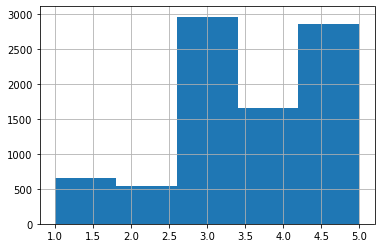

In [258]:
#based on frequency plot, we can see distribution is skewed.
hist = df['previous_year_rating'].hist(bins=5)

Based on the results above, only previous_year_rating has null values.As the null values are fairly significant(7%), we can insert the median value of 4 for previous_year_rating. We choose median instead of mean because distribution is skewed.

In [259]:
df = df.fillna(4) # replace blank values with 4.
df.isnull().mean() # check for null values

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

In [260]:
col = df.columns.values.tolist()
col

['employee_id',
 'department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

employee_id


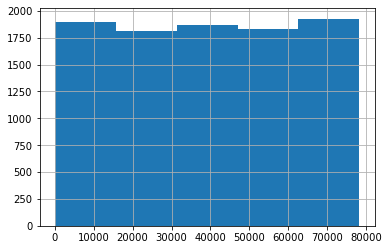

department


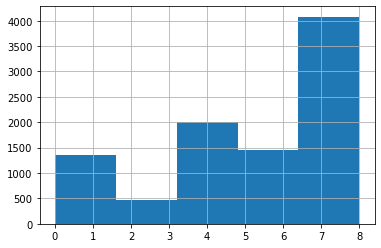

region


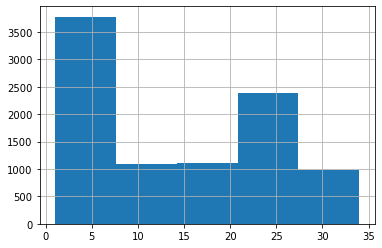

education


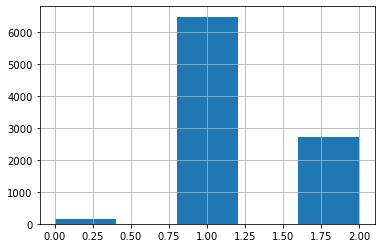

gender


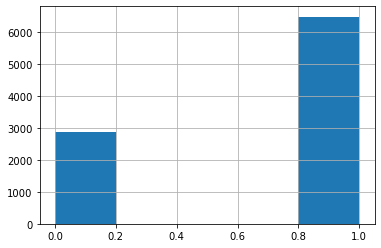

recruitment_channel


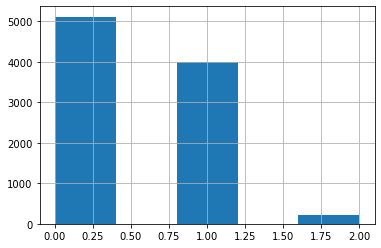

no_of_trainings


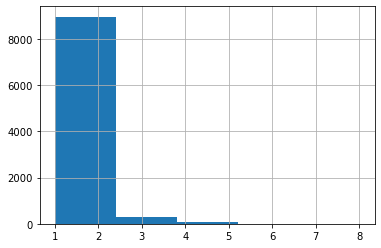

age


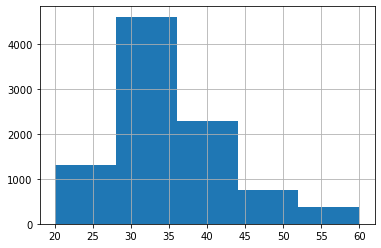

previous_year_rating


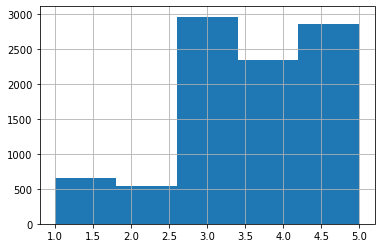

length_of_service


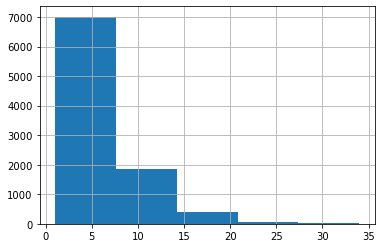

KPIs_met >80%


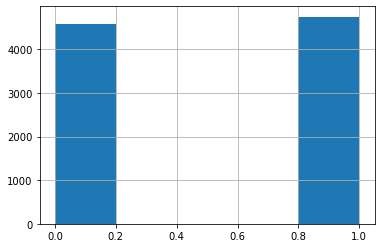

awards_won?


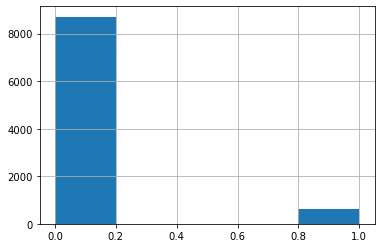

avg_training_score


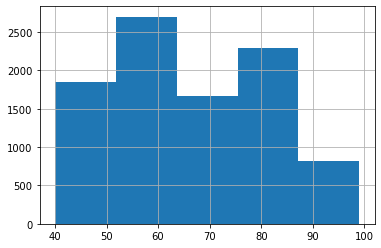

is_promoted


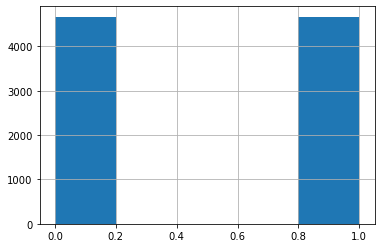

In [261]:
#shows histograms of all the columns. Doesnt really have any outliers.
for i in col:
    histoo = df[i].hist(bins=5)
    print(i)
    plt.show()


In [263]:
dfy = df.is_promoted
dfX= df.drop(['employee_id','is_promoted'],axis=1)
dfX.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,7,1,0,1,1,35,5.0,3,1,0,50
1,7,28,1,1,1,1,33,5.0,6,1,0,51
2,7,4,2,1,0,1,50,4.0,17,1,0,47
3,1,22,1,1,0,1,27,4.0,1,1,1,58
4,7,22,1,1,1,1,27,4.0,1,0,0,61


In [264]:
#convert to numpy
X = dfX.values
y = dfy.values

X

array([[ 7.,  7.,  1., ...,  1.,  0., 50.],
       [ 7., 28.,  1., ...,  1.,  0., 51.],
       [ 7.,  4.,  2., ...,  1.,  0., 47.],
       ...,
       [ 7., 28.,  2., ...,  0.,  0., 52.],
       [ 0.,  2.,  1., ...,  0.,  0., 81.],
       [ 7.,  2.,  1., ...,  0.,  0., 51.]])

In [265]:
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=2)

### Classification Model 1 - Logistic Regression

In [266]:
lg=LogisticRegression(random_state=2,
                     solver='lbfgs', #optimization
                     max_iter=100) # ensure model will converge

lg.fit(X_train,y_train)

C:\Users\Min\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

In [267]:
train_acc= lg.score(X_train,y_train)
print("Training Accuracy:%.2f%%" % (train_acc*100))

Training Accuracy:72.20%


In [268]:
lg.coef_

array([[ 0.03525768, -0.0115484 ,  0.17693939,  0.06090428, -0.04667189,
        -0.29289226, -0.05050106,  0.28465783,  0.04959869,  1.54255566,
         3.14945663,  0.03822958]])

In [269]:
lg.intercept_

array([-2.94345238])

In [270]:
# lets fine tune the hyperparameters.

param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
            'C':[1.0,1.0e+04,1.0e+08],
            'max_iter':[10,100,1000000],
            'solver':['lbfgs']}

In [271]:
lg2 = GridSearchCV(lg,param_grid=param_grid,cv=10,verbose=True,n_jobs=-1)
lg2.fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 255 out of 270 | elapsed:    7.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    9.9s finished
C:\Users\Min\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=2), n_jobs=-1,
             param_grid={'C': [1.0, 10000.0, 100000000.0],
                         'max_iter': [10, 100, 1000000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs']},
             verbose=True)

In [272]:
train_acc2=lg2.score(X_train,y_train)
print("Training Accuracy 2::%.2f%%" % (train_acc2*100))

Training Accuracy 2::72.13%


Moodel did not improve, logistics regression dont have suitable hyperparameters to be tuned.
Use the statmodel package to find p value for each coeff to understand the confidence level.We will only keep the features with p value smaller than 0.05.

In [273]:
X_train_sm = sm.add_constant(X_train)

In [274]:
lg3= sm.Logit(y_train,X_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.534143
         Iterations 6


In [275]:
lg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 7468
Model:                          Logit   Df Residuals:                     7455
Method:                           MLE   Df Model:                           12
Date:                Sun, 25 Dec 2022   Pseudo R-squ.:                  0.2294
Time:                        00:03:51   Log-Likelihood:                -3989.0
converged:                       True   LL-Null:                       -5176.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3941      0.271    -19.883      0.000      -5.926      -4.862
x1             0.0719      0.011      6.322      0.000       0.050       0.094
x2            -0.0042      0.003     -1.456      0.145      -0.010       0.001
x3             0.2136      0.062      3.423      0.001       0.091       0.336
x4             0.1096      0.060      1.833      0.067      -0.008       0.227
x5             0.0174      0.050      0.347      0.728      -0.081       0.116
x6            -0.1939      0.051     -3.820      0.000      -0.293      -0.094
x7            -0.0220      0.005     -4.096      0.000      -0.032      -0.011
x8             0.3663      0.025     14.381      0.000       0.316       0.416
x9             0.0252      0.009      2.821      0.005       0.008       0.043
x10            1.6450      0.058     28.599      0.000       1.532       1.758
x11            2.0282      0.160     12.670      0.000       1.714       2.342
x12            0.0492      0.002     23.231      0.000       0.045       0.053
==============================================================================
"""

In [276]:
dfX.columns # p value smaller than 0.05 is an indicator. 

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [277]:
# selecting only features with p <0.05 x1,x3,x6,x7,x8,x9,x10,x11,x12
dfX_new=dfX[['department', 'education', 'no_of_trainings', 'age','previous_year_rating', 'length_of_service', 'KPIs_met >80%','awards_won?', 'avg_training_score']]

In [278]:
X_new = dfX_new.values
X_train_new,X_test_new, y_train_new,y_test_new= train_test_split(X_new,y, test_size=0.2,random_state=2)
lg_new=LogisticRegression(random_state=2,solver='lbfgs',max_iter=100)
lg_new.fit(X_train_new,y_train_new)
train_acc_new=lg_new.score(X_train_new,y_train_new)
print("Training Accuracy new:%.2f%%" % (train_acc_new*100))

Training Accuracy new:72.27%


C:\Users\Min\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


There was a slight increase in accuracy once it was optimized

In [279]:
#compare base and new test results
test_acc=lg.score(X_test,y_test)
print("Testing Accuracy:%.2f%%" % (test_acc*100))

test_acc_new=lg_new.score(X_test_new,y_test_new)
print("Testing Accuracy new:%.2f%%" % (test_acc_new*100))

Testing Accuracy:73.29%
Testing Accuracy new:73.13%


New model yieled the best accuracy but only slightly. Smallest difference between the train and test data for the new model means it is also the least overfitted.


### Classification Model 2 - Decision Tree

In [204]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

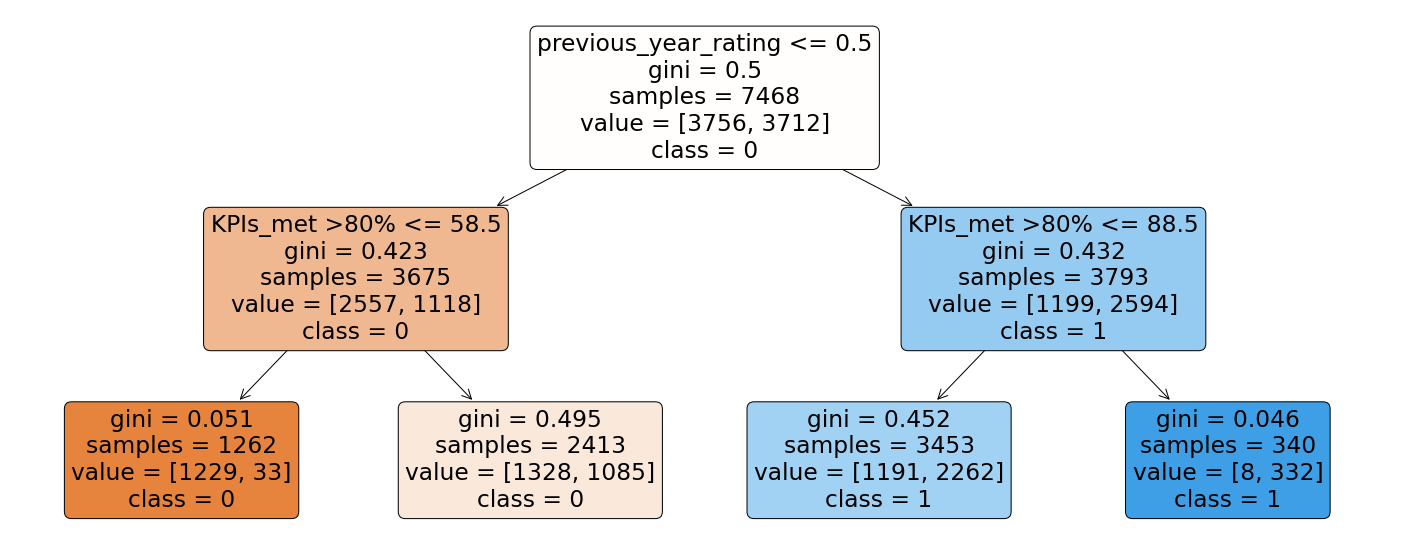

In [205]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(df.drop(['is_promoted'], axis=1)),
                class_names = ['0','1'],
                rounded = True,
                filled= True)
plt.savefig('tree1.png',format='png')
plt.show()  

Now let's evaluate the performance of our decision tree model using `score` function. For classification model, `score` function is by default caculating the classification accuracy. We will be calculating both training accuracy and testing accuracy, where: 
* **training accuracy** tells how is the model performing on the dataset which was used to train the model. 
* **testing accuracy** tells how is the model performing on the dataset it has never seen before, so this is more important.

In [208]:
#training acc
train_acc_tree = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc_tree)

test_acc_tree = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc_tree)

the training accuracy is:  0.6897429030530262
the testing accuracy is:  0.6927194860813705


Hyperparameter tuning- We will find the best parameters for Decision Tree using GridSearchCV.

In [210]:
dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) # 

print(gs.best_score_)
print(gs.best_params_)

0.7810656387839112
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [211]:
decision_tree_best = tree.DecisionTreeClassifier(criterion='gini', max_depth = 7, min_samples_leaf = 10, min_samples_split =2, random_state=2)
decision_tree_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, random_state=2)

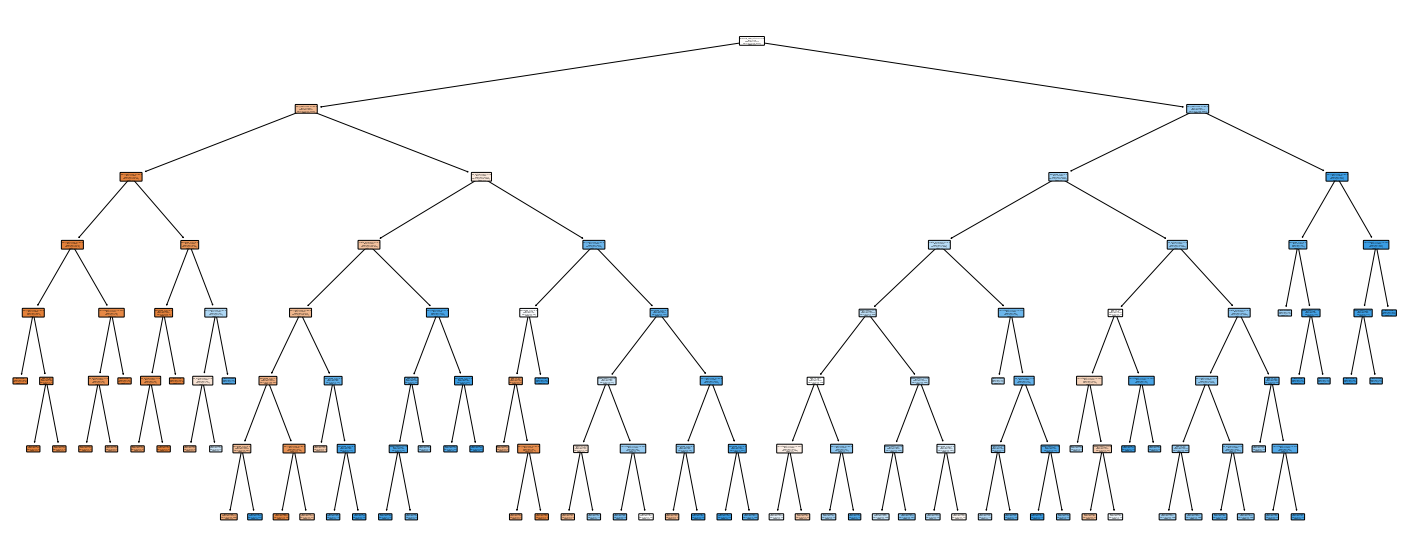

In [212]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree_best,
              feature_names = list(df.drop(['is_promoted'], axis=1)),
                class_names = ['0','1'],
                rounded = True,
                filled= True)
plt.savefig('tree2.png',format='png')
plt.show()  

In [220]:
train_acc_dt_best = decision_tree_best.score(X_train, y_train)
print('the training accuracy is: ', train_acc_dt_best)
#testing acc
test_acc_dt_best = decision_tree_best.score(X_test, y_test)
print('the testing accuracy is: ', test_acc_dt_best)

the training accuracy is:  0.7924477771826459
the testing accuracy is:  0.7890792291220556


After GridSearch we have managed to improve training and testing accuracy slightly, from around 0.68 to 0.79. 


### Random Forest Model Classifier (Ensemble Learning)
Next we will try a ensemble learning model called Random Forest and do some hyperparameter tuning. Random Forest is an ensemble of decision trees.

In [167]:
rf = RandomForestClassifier()

param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10, 12, 16], 
              'max_depth' : [2,3,4,5,6,7],
              "n_estimators":[5,10,15]}

gs = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) # 

print(gs.best_score_)
print(gs.best_params_)



0.7686149423430989
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 5}


In [230]:
rf = RandomForestClassifier()
rf_best = RandomForestClassifier(max_depth = 7, n_jobs=-1,criterion='gini',min_samples_leaf=5,min_samples_split=12,n_estimators=5)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=12,
                       n_estimators=5, n_jobs=-1)

In [231]:
rf.fit(X_train,y_train)
train_acc_rf = rf.score(X_train, y_train)
print('the training accuracy is: ', train_acc_rf)
#testing acc
test_acc_rf = rf.score(X_test, y_test)
print('the testing accuracy is: ', test_acc_rf)

the training accuracy is:  0.9993304767005892
the testing accuracy is:  0.7955032119914347


So far the RandomForestClassifier has yielded the best score comparatively although it is not far off from the optimized Decision Tree model. We can visualize the comparison of train and test accuracy of the best scores using matplotlib. As this is a relatively good accuracy score, we will be choosing this model as our ideal model for Classification. There is some overfitting as the training accuracy is significantly more than the testing accuracy, but it is acceptable as the testing accuracy is still relatively high.

Where there are time or processing constraints, decision tree may be a better choice. Overall, the Random Forest is still slightly better in terms of accuracy scores.

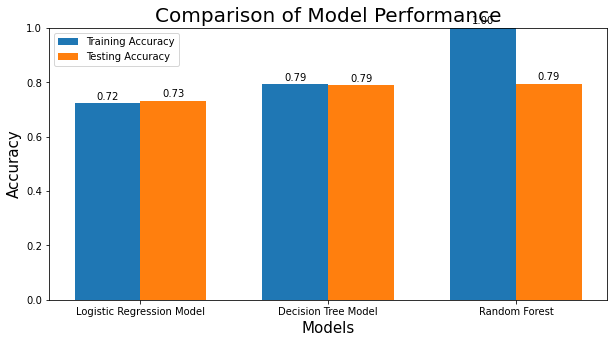

In [225]:
# Define x-axis and y-axis data values 
x_labels = ['Logistic Regression Model', 'Decision Tree Model', 'Random Forest'] 
x_axis_train = [train_acc_new, train_acc_dt_best, train_acc_rf] 
x_axis_test = [test_acc_new, test_acc_dt_best, test_acc_rf]
# Set the Label Locations and width of the bars 
x = np.arange(len(x_labels))
width = 0.35
plt.figure(figsize=(10,5))
# Plot side-by-side bars
bar1 = plt.bar(x - width/2, x_axis_train, width, label='Training Accuracy')
bar2 = plt.bar(x + width/2, x_axis_test, width, label='Testing Accuracy')
#Customise the plot
plt.title('Comparison of Model Performance', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Models', fontsize = 15)
plt.xticks(x, x_labels)
plt.ylim (bottom = 0, top = 1.0)
plt.legend()
# Create a function to display data Labels/annotations for each bar 
def autolabel(bars):
    for each in bars:
        acc=each.get_height()
        plt.annotate('{:.2f}'.format(acc),
            xy=(each.get_x() + each.get_width() / 2, acc), 
            xytext=(0, 2), # 2 points vertical offset 
            textcoords="offset points",
            ha='center', va='bottom')
# Use the auto label function to display data Label for each bar
autolabel(bar1)
autolabel(bar2)

### 2. AIRBNB (REGRESSION PROBLEM)
### Data Loading and Preprocessing

In [2]:
df1 = pd.read_csv("listings.csv")

In [3]:
df1.head()

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,266763,5,1.44255,103.79580,0,83,180,1,2136.0,0.01,2,365
1,50646,227796,1,1.33235,103.78521,0,81,90,18,1705.0,0.28,1,365
2,56334,266763,5,1.44246,103.79667,0,69,6,20,1426.0,0.20,2,365
3,71609,367042,3,1.34541,103.95712,0,206,1,14,16.0,0.15,9,353
4,71896,367042,3,1.34567,103.95963,0,94,1,22,30.0,0.22,9,355


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7224 entries, 0 to 7223
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7224 non-null   int64  
 1   host_id                         7224 non-null   int64  
 2   neighbourhood_group             7224 non-null   int64  
 3   latitude                        7224 non-null   float64
 4   longitude                       7224 non-null   float64
 5   room_type                       7224 non-null   int64  
 6   price                           7224 non-null   int64  
 7   minimum_nights                  7224 non-null   int64  
 8   number_of_reviews               7224 non-null   int64  
 9   last_review                     7224 non-null   float64
 10  reviews_per_month               4739 non-null   float64
 11  calculated_host_listings_count  7224 non-null   int64  
 12  availability_365                72

### Perform Basic Statistical Analysis

In [5]:
df1.describe()

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,7.224000e+03,7.224000e+03,7224.000000,7224.000000,7224.000000,7224.000000,7224.000000,7224.000000,7224.000000,7224.000000,4739.000000,7224.000000,7224.000000
mean,2.315830e+07,8.902900e+07,1.449197,1.314986,103.849339,0.599114,124.759690,18.036545,13.100498,801.371539,1.023739,40.918051,204.923311
std,1.021843e+07,8.195540e+07,0.989447,0.030913,0.044400,0.588674,73.110677,42.128434,29.935773,833.209712,1.259855,65.788570,146.966262
min,4.909100e+04,2.366600e+04,1.000000,1.245260,103.665470,0.000000,0.000000,1.000000,0.000000,0.000000,0.010000,1.000000,0.000000
25%,1.541146e+07,2.138628e+07,1.000000,1.295920,103.836467,0.000000,60.000000,1.000000,0.000000,33.000000,0.180000,1.000000,49.000000
50%,2.435896e+07,5.916716e+07,1.000000,1.311400,103.850235,1.000000,110.000000,3.000000,2.000000,315.000000,0.540000,9.000000,254.000000
75%,3.227101e+07,1.518028e+08,1.000000,1.322885,103.876135,1.000000,169.000000,12.000000,11.000000,1887.000000,1.350000,48.000000,354.000000
max,3.811276e+07,2.885676e+08,5.000000,1.454590,103.973420,2.000000,300.000000,1000.000000,323.000000,2136.000000,13.000000,274.000000,365.000000


id


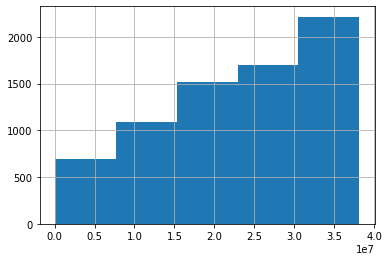

host_id


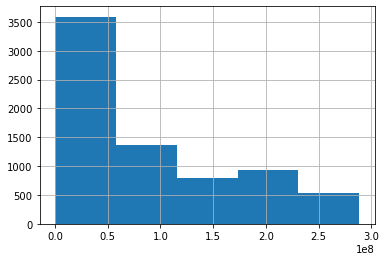

neighbourhood_group


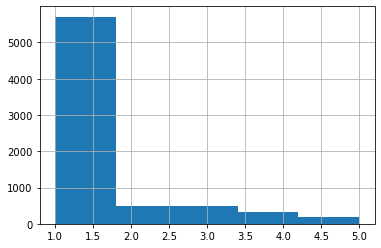

latitude


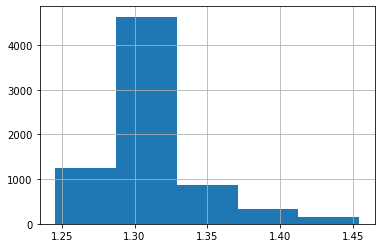

longitude


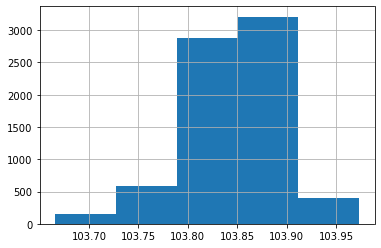

room_type


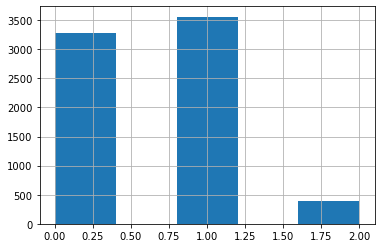

price


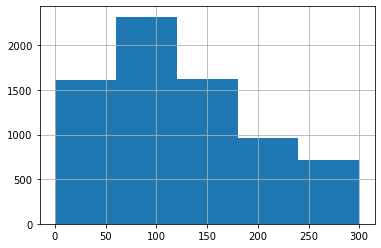

minimum_nights


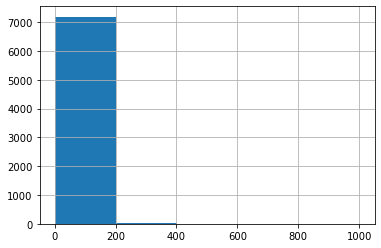

number_of_reviews


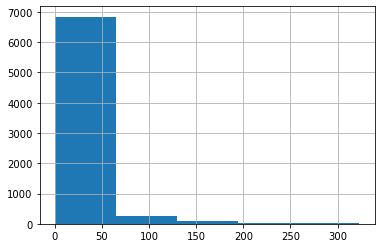

last_review


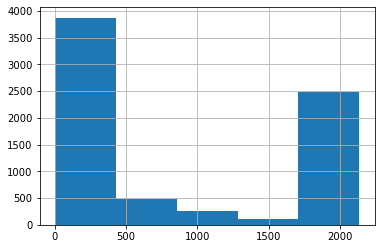

reviews_per_month


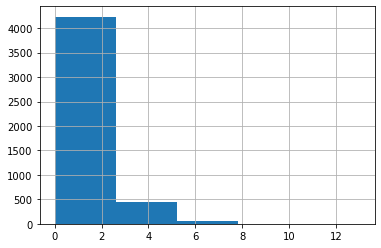

calculated_host_listings_count


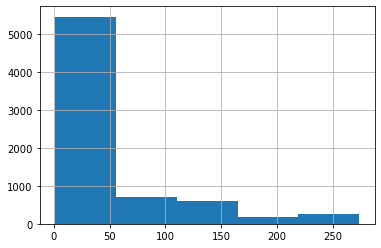

availability_365


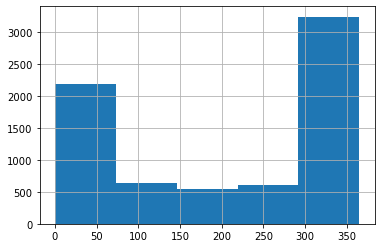

In [4]:
col1 = df1.columns.values.tolist()

for i in col1:
    histoo = df1[i].hist(bins=5)
    print(i)
    plt.show()

In [6]:
df1.isnull().mean()

id                                0.000000
host_id                           0.000000
neighbourhood_group               0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.000000
reviews_per_month                 0.343992
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

We will fill in the missing values with the median value. as we can see above, the values are skewed hence we will choose the median value to fill and check if the values are filled.

In [7]:
df1['reviews_per_month'].median()

0.54

In [8]:
df1 = df1.fillna(0.54) # replace blank values.
df1.isnull().mean() # check if the null values are removed

id                                0.0
host_id                           0.0
neighbourhood_group               0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [9]:
dfy1 = df1.price
dfX1= df1.drop(['price','id','host_id'],axis=1) # remove y value, remove ID values as not relevant
dfX1.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5,1.44255,103.79580,0,180,1,2136.0,0.01,2,365
1,1,1.33235,103.78521,0,90,18,1705.0,0.28,1,365
2,5,1.44246,103.79667,0,6,20,1426.0,0.20,2,365
3,3,1.34541,103.95712,0,1,14,16.0,0.15,9,353
4,3,1.34567,103.95963,0,1,22,30.0,0.22,9,355


In [10]:
X = dfX1.values
y = dfy1.values
X

array([[5.0000000e+00, 1.4425500e+00, 1.0379580e+02, ..., 1.0000000e-02,
        2.0000000e+00, 3.6500000e+02],
       [1.0000000e+00, 1.3323500e+00, 1.0378521e+02, ..., 2.8000000e-01,
        1.0000000e+00, 3.6500000e+02],
       [5.0000000e+00, 1.4424600e+00, 1.0379667e+02, ..., 2.0000000e-01,
        2.0000000e+00, 3.6500000e+02],
       ...,
       [1.0000000e+00, 1.3128600e+00, 1.0385996e+02, ..., 5.4000000e-01,
        3.0000000e+00, 1.7300000e+02],
       [1.0000000e+00, 1.2954300e+00, 1.0383801e+02, ..., 5.4000000e-01,
        2.0000000e+00, 3.0000000e+01],
       [1.0000000e+00, 1.2967200e+00, 1.0383325e+02, ..., 5.4000000e-01,
        7.0000000e+00, 3.6500000e+02]])

In [11]:
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=2)

### Model 2.1 Linear Regression

In [12]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [13]:
#comparing columns against coefficients.
names = dfX1.columns
list(zip(names,lm.coef_))

[('neighbourhood_group', -5.148515006283491),
 ('latitude', -135.56689362727062),
 ('longitude', 74.75075061541783),
 ('room_type', 36.28686851622236),
 ('minimum_nights', -0.16167907268351864),
 ('number_of_reviews', -0.15439453409692805),
 ('last_review', 0.0077952902181114645),
 ('reviews_per_month', 5.870635019427712),
 ('calculated_host_listings_count', 0.15943249109204313),
 ('availability_365', 0.02005564253279554)]

In [54]:
# Linear model train score
lm_train=lm.score(X_train,y_train)
lm_train

0.20125380314060737

In [39]:

lm_test=lm.score(X_test,y_test)
lm_test

0.15420985977572732

As we can see from above, the train and test scores are quite low. This may be due to the model being not suitable for this data, we will do some fine tuning to see if there is an improvement on the test score.

In [36]:
y_pred= lm.predict(X_test) # predictions on test data

In [29]:
#fine tuning a regression model.
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train,X_train_sm).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     145.3
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          1.68e-272
Time:                        16:35:18   Log-Likelihood:                -32313.
No. Observations:                5779   AIC:                         6.465e+04
Df Residuals:                    5768   BIC:                         6.472e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7491.0859   2079.846     -3.602      0.000   -1.16e+04   -3413.806
x1            -5.1485      1.403     -3.671      0.000      -7.898      -2.399
x2          -135.5669     44.025     -3.079      0.002    -221.873     -49.260
x3            74.7508     19.928      3.751      0.000      35.685     113.817
x4            36.2869      1.546     23.474      0.000      33.257      39.317
x5            -0.1617      0.021     -7.567      0.000      -0.204      -0.120
x6            -0.1544      0.039     -3.983      0.000      -0.230      -0.078
x7             0.0078      0.001      6.835      0.000       0.006       0.010
x8             5.8706      1.089      5.392      0.000       3.736       8.005
x9             0.1594      0.014     11.113      0.000       0.131       0.188
x10            0.0201      0.006      3.267      0.001       0.008       0.032
==============================================================================
Omnibus:                      148.072   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.073
Skew:                           0.371   Prob(JB):                     2.35e-36
Kurtosis:                       3.361   Cond. No.                     2.83e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All p values smaller than 0.05. no more hyperparameter tuning to be done.

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

MSE1= mean_squared_error(y_test,y_pred)
RMSE1 = sqrt(MSE1)

MAE1=mean_absolute_error(y_test,y_pred)

print('RMSE of Model 1:{:.2f}'.format(RMSE1))
print('MAE of Model 1:{:.2f}'.format(MAE1))

RMSE of Model 1:69.07
MAE of Model 1:53.34


Linear Regression may not be suitable as the values do not follow a linear pattern, as seen below when we try to plot the x values (features) against the  Y values (target variable). We will try other models, such as a Decision Tree Regressor and XGBoost and RandomForest Regressor.

Text(0.5, 0, 'X')

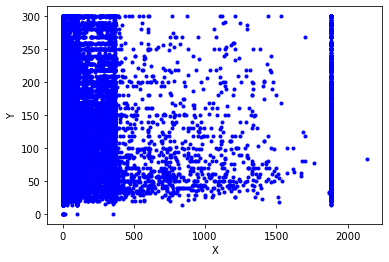

In [297]:
#Linear regression likely not suitable as values do not follow a linear pattern in general.
plt.plot(X,y, 'b.')
plt.ylabel('Y')
plt.xlabel('X')

### 2.2 Decision Tree Regressor

We will try a basic Decision Tree Regressor with max depth of 2 to see what is the baseline score

In [15]:
tree_reg = tree.DecisionTreeRegressor(max_depth=2, random_state=2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

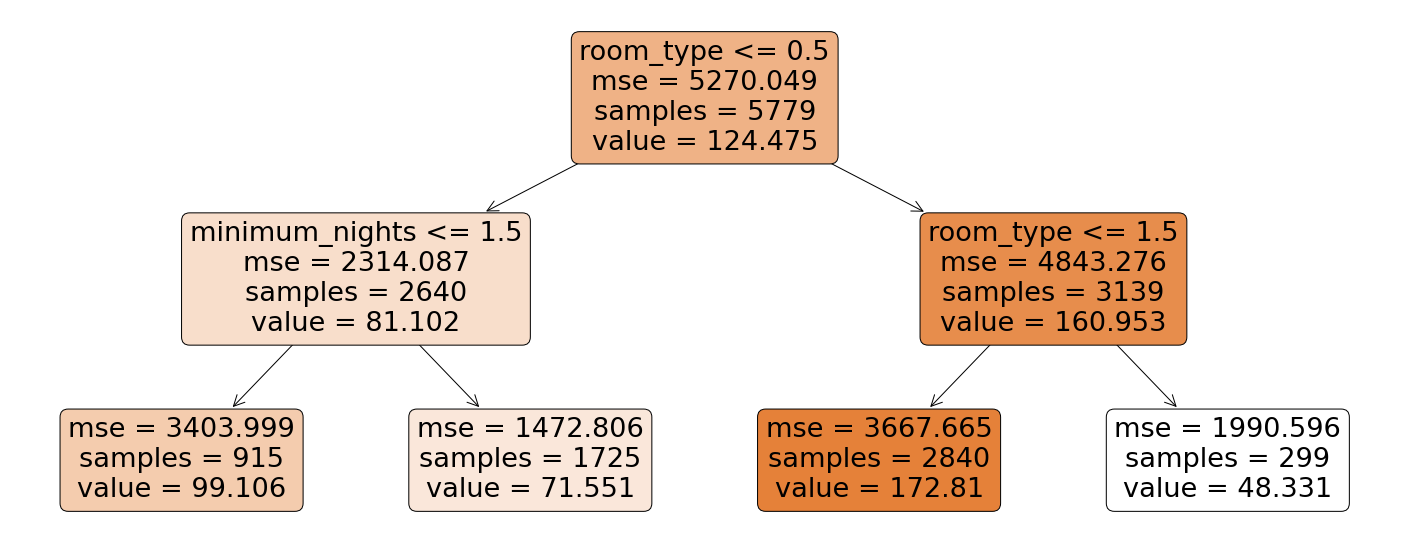

In [16]:
plt.figure(figsize=(25,10))
tree.plot_tree(tree_reg,
               feature_names =list(df1.drop(['price','id','host_id'],axis=1)),
                rounded = True,
                filled= True)
plt.savefig('regression_tree.png',format='png')
plt.show() 

In [17]:
#training mse
train_mse = mean_squared_error(tree_reg.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(tree_reg.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  2883.994976844533
the testing mean squared error is:  3109.398779785557


In [18]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value rangs from 0 to 1 and the higher the better
train_R2 = tree_reg.score(X_train, y_train)
print('training R^2 value is: ', train_R2)

test_R2 = tree_reg.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.4527574980379382
testing R^2 value is:  0.44871578874948803


### Perform GridSearch to improve the above Decision Tree Regressor<a id='exc' />

In [19]:
# Task 3: Use GridSearch to find the best combination of model hyperparameters
#dt = tree.DecisionTreeRegressor(max_depth = 2)
param_grid = {"splitter":["best","random"],
              "max_depth" : [1,3,5,7,9,11,12],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}

gs = GridSearchCV(tree_reg, param_grid=param_grid, scoring='neg_mean_squared_error',cv=3,verbose=3)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

Fitting 3 folds for each of 140 candidates, totalling 420 fits
[CV] max_depth=1, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=1, splitter=best, score=-3473.567, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=1, splitter=best, score=-3987.556, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=1, splitter=best, score=-3618.292, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=1, splitter=random, score=-4674.574, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=1, splitter=random, score=-5177.537, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=1, splitter=random, score=-4927.061, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=1, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=5, splitter=best, score=-3987.556, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=5, splitter=best, score=-3618.292, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=5, splitter=random, score=-4674.574, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=5, splitter=random, score=-5177.537, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=5, splitter=random, score=-4927.061, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=6, splitter=best, score=-3473.567, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, splitter=best .....

[CV]  max_depth=3, min_samples_leaf=5, splitter=best, score=-2634.930, total=   0.0s
[CV] max_depth=3, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=3, min_samples_leaf=5, splitter=random, score=-2737.000, total=   0.0s
[CV] max_depth=3, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=3, min_samples_leaf=5, splitter=random, score=-3198.039, total=   0.0s
[CV] max_depth=3, min_samples_leaf=5, splitter=random ................
[CV]  max_depth=3, min_samples_leaf=5, splitter=random, score=-2823.357, total=   0.0s
[CV] max_depth=3, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=3, min_samples_leaf=6, splitter=best, score=-2596.709, total=   0.0s
[CV] max_depth=3, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=3, min_samples_leaf=6, splitter=best, score=-3014.062, total=   0.0s
[CV] max_depth=3, min_samples_leaf=6, splitter=best ..................
[CV]  max_depth=3, min_samples_leaf=6, splitter=best, scor

[CV]  max_depth=5, min_samples_leaf=4, splitter=best, score=-2406.528, total=   0.0s
[CV] max_depth=5, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=5, min_samples_leaf=4, splitter=random, score=-2692.327, total=   0.0s
[CV] max_depth=5, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=5, min_samples_leaf=4, splitter=random, score=-3059.637, total=   0.0s
[CV] max_depth=5, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=5, min_samples_leaf=4, splitter=random, score=-2694.034, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=5, min_samples_leaf=5, splitter=best, score=-2402.802, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=5, min_samples_leaf=5, splitter=best, score=-2715.458, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, splitter=best ..................
[CV]  max_depth=5, min_samples_leaf=5, splitter=best, scor

[CV]  max_depth=7, min_samples_leaf=3, splitter=best, score=-2330.462, total=   0.0s
[CV] max_depth=7, min_samples_leaf=3, splitter=random ................
[CV]  max_depth=7, min_samples_leaf=3, splitter=random, score=-2464.794, total=   0.0s
[CV] max_depth=7, min_samples_leaf=3, splitter=random ................
[CV]  max_depth=7, min_samples_leaf=3, splitter=random, score=-2873.117, total=   0.0s
[CV] max_depth=7, min_samples_leaf=3, splitter=random ................
[CV]  max_depth=7, min_samples_leaf=3, splitter=random, score=-2483.258, total=   0.0s
[CV] max_depth=7, min_samples_leaf=4, splitter=best ..................
[CV]  max_depth=7, min_samples_leaf=4, splitter=best, score=-2310.746, total=   0.0s
[CV] max_depth=7, min_samples_leaf=4, splitter=best ..................
[CV]  max_depth=7, min_samples_leaf=4, splitter=best, score=-2443.252, total=   0.0s
[CV] max_depth=7, min_samples_leaf=4, splitter=best ..................
[CV]  max_depth=7, min_samples_leaf=4, splitter=best, scor

[CV]  max_depth=11, min_samples_leaf=1, splitter=random, score=-2539.745, total=   0.0s
[CV] max_depth=11, min_samples_leaf=1, splitter=random ...............
[CV]  max_depth=11, min_samples_leaf=1, splitter=random, score=-2883.195, total=   0.0s
[CV] max_depth=11, min_samples_leaf=1, splitter=random ...............
[CV]  max_depth=11, min_samples_leaf=1, splitter=random, score=-2405.065, total=   0.0s
[CV] max_depth=11, min_samples_leaf=2, splitter=best .................
[CV]  max_depth=11, min_samples_leaf=2, splitter=best, score=-2555.430, total=   0.0s
[CV] max_depth=11, min_samples_leaf=2, splitter=best .................
[CV]  max_depth=11, min_samples_leaf=2, splitter=best, score=-2703.931, total=   0.0s
[CV] max_depth=11, min_samples_leaf=2, splitter=best .................
[CV]  max_depth=11, min_samples_leaf=2, splitter=best, score=-2464.510, total=   0.0s
[CV] max_depth=11, min_samples_leaf=2, splitter=random ...............
[CV]  max_depth=11, min_samples_leaf=2, splitter=ran

[CV]  max_depth=12, min_samples_leaf=1, splitter=best, score=-2828.541, total=   0.1s
[CV] max_depth=12, min_samples_leaf=1, splitter=best .................
[CV]  max_depth=12, min_samples_leaf=1, splitter=best, score=-2869.402, total=   0.0s
[CV] max_depth=12, min_samples_leaf=1, splitter=random ...............
[CV]  max_depth=12, min_samples_leaf=1, splitter=random, score=-2742.327, total=   0.0s
[CV] max_depth=12, min_samples_leaf=1, splitter=random ...............
[CV]  max_depth=12, min_samples_leaf=1, splitter=random, score=-2973.639, total=   0.0s
[CV] max_depth=12, min_samples_leaf=1, splitter=random ...............
[CV]  max_depth=12, min_samples_leaf=1, splitter=random, score=-2649.390, total=   0.0s
[CV] max_depth=12, min_samples_leaf=2, splitter=best .................
[CV]  max_depth=12, min_samples_leaf=2, splitter=best, score=-2611.378, total=   0.0s
[CV] max_depth=12, min_samples_leaf=2, splitter=best .................
[CV]  max_depth=12, min_samples_leaf=2, splitter=bes

[CV]  max_depth=12, min_samples_leaf=10, splitter=best, score=-2228.104, total=   0.0s
[CV] max_depth=12, min_samples_leaf=10, splitter=random ..............
[CV]  max_depth=12, min_samples_leaf=10, splitter=random, score=-2452.542, total=   0.0s
[CV] max_depth=12, min_samples_leaf=10, splitter=random ..............
[CV]  max_depth=12, min_samples_leaf=10, splitter=random, score=-2546.526, total=   0.0s
[CV] max_depth=12, min_samples_leaf=10, splitter=random ..............
[CV]  max_depth=12, min_samples_leaf=10, splitter=random, score=-2272.407, total=   0.0s
-2256.318427922228
{'max_depth': 9, 'min_samples_leaf': 9, 'splitter': 'best'}


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    8.3s finished


In [20]:
# Create Decision Tree using the best hyperparameters
decision_tree = tree.DecisionTreeRegressor(max_depth = 9, min_samples_leaf = 9, splitter ='best', random_state=2)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=9, random_state=2)

In [21]:
# Task 5: Evaluate the Model by calculating training mse and testing mse
#training mse
train_mse = mean_squared_error(decision_tree.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)

#testing mse
test_mse = mean_squared_error(decision_tree.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  1608.5537038394034
the testing mean squared error is:  2629.927997073033


In [22]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value rangs from 0 to 1 and the higher the better
train_R2 = decision_tree.score(X_train, y_train)
print('training R^2 value is: ', train_R2)

test_R2 = decision_tree.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.694774449852702
testing R^2 value is:  0.5337240784496495


Better compared to before GridSearchCV hyperparameter tuning.However there is some overfitting as the testing r2 value is significantly lower than the train value.
#this model might be more suitable for decisiontree regressor than linear regression due to the improvement in r2 value.
Linear regression is a linear model, which means it works really nicely when the data has a linear shape. But, when the data has a non-linear shape, then a linear model cannot capture the non-linear features.

So in this case, you can use the decision trees, which do a better job at capturing the non-linearity in the data.

Next we will try Ensemble Learning- XGB regressor.


### XGB Regressor

In [58]:
import pandas as pd
import  numpy  as  np
from  sklearn.preprocessing  import  OrdinalEncoder
from  sklearn.model_selection  import  train_test_split
from  sklearn.ensemble  import  RandomForestRegressor
from  sklearn.metrics  import  mean_squared_error
from  xgboost  import  XGBRegressor

C:\Users\Min\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [65]:
xgb_model = XGBRegressor(random_state = 2, n_jobs=-1)

In [67]:
# Use GridSearch to find the best combination of model hyperparameters
param_grid2 = {"learning_rate":[0.1,0.001],
              "max_depth" : [1,5,15,17,20],
            "min_child_weight":[1,10,20,25,30]}

gs = GridSearchCV(xgb_model, param_grid=param_grid2, scoring='neg_mean_squared_error',cv=3,verbose=3)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] learning_rate=0.1, max_depth=1, min_child_weight=1 ..............
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=1, score=-2540.859, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=1 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, min_child_weight=1, score=-3017.823, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=1 ..............
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=1, score=-2656.700, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=10 .............
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=10, score=-2540.859, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=10 .............
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=10, score=-3015.691, total=   0.1s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s



[CV] learning_rate=0.1, max_depth=1, min_child_weight=10 .............
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=10, score=-2650.720, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=20 .............
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=20, score=-2540.859, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=20 .............
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=20, score=-3015.691, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=20 .............
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=20, score=-2650.720, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=25 .............
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=25, score=-2540.859, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, min_child_weight=25 .............
[CV]  learning_rate=0.1, max_depth=1, min_child_weight=25, score=-3015.691, total=   0.1s
[CV] learning_rate=0.1, max_depth

[CV]  learning_rate=0.1, max_depth=17, min_child_weight=25, score=-1714.311, total=   0.6s
[CV] learning_rate=0.1, max_depth=17, min_child_weight=30 ............
[CV]  learning_rate=0.1, max_depth=17, min_child_weight=30, score=-1798.961, total=   0.6s
[CV] learning_rate=0.1, max_depth=17, min_child_weight=30 ............
[CV]  learning_rate=0.1, max_depth=17, min_child_weight=30, score=-1971.360, total=   0.6s
[CV] learning_rate=0.1, max_depth=17, min_child_weight=30 ............
[CV]  learning_rate=0.1, max_depth=17, min_child_weight=30, score=-1708.911, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, min_child_weight=1 .............
[CV]  learning_rate=0.1, max_depth=20, min_child_weight=1, score=-1931.078, total=   2.9s
[CV] learning_rate=0.1, max_depth=20, min_child_weight=1 .............
[CV]  learning_rate=0.1, max_depth=20, min_child_weight=1, score=-2040.143, total=   2.7s
[CV] learning_rate=0.1, max_depth=20, min_child_weight=1 .............
[CV]  learning_rate=0.1, max_d

[CV]  learning_rate=0.001, max_depth=15, min_child_weight=1, score=-17069.896, total=   0.8s
[CV] learning_rate=0.001, max_depth=15, min_child_weight=10 ..........
[CV]  learning_rate=0.001, max_depth=15, min_child_weight=10, score=-16784.246, total=   0.7s
[CV] learning_rate=0.001, max_depth=15, min_child_weight=10 ..........
[CV]  learning_rate=0.001, max_depth=15, min_child_weight=10, score=-18176.491, total=   0.6s
[CV] learning_rate=0.001, max_depth=15, min_child_weight=10 ..........
[CV]  learning_rate=0.001, max_depth=15, min_child_weight=10, score=-17046.067, total=   0.6s
[CV] learning_rate=0.001, max_depth=15, min_child_weight=20 ..........
[CV]  learning_rate=0.001, max_depth=15, min_child_weight=20, score=-16789.366, total=   0.6s
[CV] learning_rate=0.001, max_depth=15, min_child_weight=20 ..........
[CV]  learning_rate=0.001, max_depth=15, min_child_weight=20, score=-18168.783, total=   0.6s
[CV] learning_rate=0.001, max_depth=15, min_child_weight=20 ..........
[CV]  learn

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.5min finished


-1802.8120972655295
{'learning_rate': 0.1, 'max_depth': 17, 'min_child_weight': 20}


In [68]:
xgb_best = XGBRegressor(max_depth = 17, n_jobs=-1,learning_rate=0.1,min_child_weight=20, random_state=2)
xgb_best.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=17, min_child_weight=20, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=2, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [69]:
xgbtrain_R2 = xgb_best.score(X_train, y_train)
print('training R^2 value is: ', xgbtrain_R2)

xgbtest_R2 = xgb_best.score(X_test, y_test)
print('testing R^2 value is: ', xgbtest_R2)

training R^2 value is:  0.9127165363276325
testing R^2 value is:  0.6391494668072065


In [71]:
#training mse
xgbtrain_mse = mean_squared_error(xgb_best.predict(X_train), y_train)
print('the training mean squared error is: ', xgbtrain_mse)

#testing mse
xgbtest_mse = mean_squared_error(xgb_best.predict(X_test), y_test)
print('the testing mean squared error is: ',xgbtest_mse)

the training mean squared error is:  459.98815861373134
the testing mean squared error is:  2035.2990067491212


The XGBoost Regressor is the best model. However, like the decision tree regressor, it tends towards overfitting. It also has the Lowest mean squared error.

We will further modify the XGBoost Regressor by tuning a few extra parameters to mitigate the overfitting issue. Some possibilities include those highlighted in the link below. I decided to add in subsample and gamma to GridSearchCV to further tune the hyperparameters.

From https://xgboost.readthedocs.io/en/latest/parameter.html

subsample [default=1]

Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.

range: (0,1]


We optimized this earlier, with an ideal value of 17. we may need to reduce this if we are concerned about overfitting.

max_depth [default=6]

Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth. Beware that XGBoost aggressively consumes memory when training a deep tree. exact tree method requires non-zero value.

range: [0,∞]

min loss reduction (gamma).Larger values may assist in overfitting.

In [120]:
# Use GridSearch to find the best combination of model hyperparameters
param_grid2 = {"learning_rate":[0.1,0.001],
              "max_depth" : [1,5,15,17,20],
            "min_child_weight":[1,10,20,25,30],
               "subsample":[0.2,0.5,0.7,1],
              "gamma":[0.2,0.5,1,5,7]}

gs = GridSearchCV(xgb_model, param_grid=param_grid2, scoring='neg_mean_squared_error',cv=3,verbose=3)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.2, score=-2475.455, total=   0.2s
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.2, score=-2956.710, total=   0.1s
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.2, score=-2594.258, total=   0.1s
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.5, score=-2510.995, total=   0.1s
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.5, score=-2983.361, total=   0.1s
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.5, score=-2620.666, total=   0.1s
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.7, score=-2522.192, total=   0.1s
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.7, score=-3000.685, total=   0.1s
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=0.7, score=-2624.926, total=   0.1s
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=1 
[CV]  gamma=

[CV]  gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=25, subsample=1, score=-2650.720, total=   0.1s
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.2, score=-2474.974, total=   0.1s
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.2, score=-2939.347, total=   0.1s
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.2, score=-2590.748, total=   0.1s
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.5, score=-2510.995, total=   0.1s
[CV] gamma=0.2, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.5 
[C

[CV]  gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=20, subsample=0.5, score=-1813.678, total=   0.2s
[CV] gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=20, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=20, subsample=0.7, score=-1839.449, total=   0.2s
[CV] gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=20, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=20, subsample=0.7, score=-2063.311, total=   0.2s
[CV] gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=20, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=20, subsample=0.7, score=-1789.090, total=   0.2s
[CV] gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=20, subsample=1 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=20, subsample=1, score=-1857.666, total=   0.2s
[CV] gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=20, subsample=1 
[CV]  

[CV]  gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=1, subsample=1, score=-1842.804, total=   1.5s
[CV] gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=0.2, score=-1854.917, total=   0.3s
[CV] gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=0.2, score=-2151.363, total=   0.3s
[CV] gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=0.2, score=-1836.080, total=   0.4s
[CV] gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=0.5, score=-1772.536, total=   0.5s
[CV] gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=10, subsampl

[CV]  gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=30, subsample=0.5, score=-2067.605, total=   0.5s
[CV] gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=30, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=30, subsample=0.5, score=-1781.933, total=   0.5s
[CV] gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=30, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=30, subsample=0.7, score=-1774.594, total=   0.6s
[CV] gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=30, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=30, subsample=0.7, score=-2003.502, total=   0.6s
[CV] gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=30, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=30, subsample=0.7, score=-1717.778, total=   0.6s
[CV] gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=30, subsa

[CV]  gamma=0.2, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=1, score=-1759.755, total=   0.8s
[CV] gamma=0.2, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=1 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=1, score=-1955.514, total=   0.7s
[CV] gamma=0.2, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=1 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=1, score=-1693.167, total=   1.0s
[CV] gamma=0.2, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=0.2, score=-1915.937, total=   0.3s
[CV] gamma=0.2, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=0.2, score=-2179.560, total=   0.3s
[CV] gamma=0.2, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=0.2 


[CV]  gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=10, subsample=0.2, score=-1895.781, total=   0.3s
[CV] gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=10, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=10, subsample=0.5, score=-1800.391, total=   0.6s
[CV] gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=10, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=10, subsample=0.5, score=-2025.011, total=   0.6s
[CV] gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=10, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=10, subsample=0.5, score=-1728.044, total=   0.7s
[CV] gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=10, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=10, subsample=0.7, score=-1800.747, total=   1.0s
[CV] gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=10, subsa

[CV]  gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=0.7, score=-1989.437, total=   0.6s
[CV] gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=0.7, score=-1710.188, total=   0.6s
[CV] gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=1 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=1, score=-1791.348, total=   0.8s
[CV] gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=1 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=1, score=-1970.027, total=   0.7s
[CV] gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=1 
[CV]  gamma=0.2, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=1, score=-1735.994, total=   0.8s
[CV] gamma=0.2, learning_rate=0.001, max_depth=1, min_child_weight=1, subsample=0.2 
[C

[CV]  gamma=0.2, learning_rate=0.001, max_depth=1, min_child_weight=25, subsample=0.2, score=-18444.479, total=   0.1s
[CV] gamma=0.2, learning_rate=0.001, max_depth=1, min_child_weight=25, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=1, min_child_weight=25, subsample=0.2, score=-17297.246, total=   0.1s
[CV] gamma=0.2, learning_rate=0.001, max_depth=1, min_child_weight=25, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=1, min_child_weight=25, subsample=0.5, score=-16981.294, total=   0.1s
[CV] gamma=0.2, learning_rate=0.001, max_depth=1, min_child_weight=25, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=1, min_child_weight=25, subsample=0.5, score=-18436.270, total=   0.1s
[CV] gamma=0.2, learning_rate=0.001, max_depth=1, min_child_weight=25, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=1, min_child_weight=25, subsample=0.5, score=-17284.814, total=   0.1s
[CV] gamma=0.2, learning_rate=0.001, max_depth=1, min_child_w

[CV]  gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.7, score=-16791.263, total=   0.3s
[CV] gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.7, score=-18208.946, total=   0.3s
[CV] gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.7, score=-17076.796, total=   0.3s
[CV] gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=1 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=1, score=-16789.127, total=   0.3s
[CV] gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=1 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=1, score=-18204.421, total=   0.3s
[CV] gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=10

[CV]  gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=30, subsample=1, score=-17071.400, total=   0.3s
[CV] gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=1, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=1, subsample=0.2, score=-16877.324, total=   0.5s
[CV] gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=1, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=1, subsample=0.2, score=-18289.152, total=   0.5s
[CV] gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=1, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=1, subsample=0.2, score=-17164.915, total=   0.5s
[CV] gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=1, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=1, subsample=0.5, score=-16837.524, total=   0.7s
[CV] gamma=0.2, learning_rate=0.001, max_depth=15, min_child_we

[CV]  gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.5, score=-16803.507, total=   0.4s
[CV] gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.5, score=-18205.845, total=   0.4s
[CV] gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.5, score=-17077.255, total=   0.4s
[CV] gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.7, score=-16793.787, total=   0.5s
[CV] gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.7, score=-18192.686, total=   0.5s
[CV] gamma=0.2, learning_rate=0.001, max_depth=15, m

[CV]  gamma=0.2, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=0.7, score=-18196.275, total=   0.5s
[CV] gamma=0.2, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=0.7, score=-17056.953, total=   0.5s
[CV] gamma=0.2, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=1 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=1, score=-16784.246, total=   0.7s
[CV] gamma=0.2, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=1 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=1, score=-18176.491, total=   0.6s
[CV] gamma=0.2, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=1 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=1, score=-17046.067, total=   0.6s
[CV] gamma=0.2, learning_rate=0.001, max_depth=17, min_child_wei

[CV]  gamma=0.2, learning_rate=0.001, max_depth=17, min_child_weight=30, subsample=1, score=-17044.362, total=   0.6s
[CV] gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.2, score=-16877.373, total=   0.4s
[CV] gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.2, score=-18289.152, total=   0.4s
[CV] gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.2 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.2, score=-17164.915, total=   0.4s
[CV] gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.5, score=-16837.719, total=   0.6s
[CV] gamma=0.2, learning_rate=0.001, max_depth=20, min_child_w

[CV]  gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.5, score=-16803.507, total=   0.5s
[CV] gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.5, score=-18205.845, total=   0.5s
[CV] gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.5 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.5, score=-17077.255, total=   0.5s
[CV] gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.7, score=-16793.787, total=   0.6s
[CV] gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.7 
[CV]  gamma=0.2, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.7, score=-18192.686, total=   0.6s
[CV] gamma=0.2, learning_rate=0.001, max_depth=20, m

[CV]  gamma=0.5, learning_rate=0.1, max_depth=1, min_child_weight=10, subsample=1, score=-2540.859, total=   0.1s
[CV] gamma=0.5, learning_rate=0.1, max_depth=1, min_child_weight=10, subsample=1 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=1, min_child_weight=10, subsample=1, score=-3015.691, total=   0.1s
[CV] gamma=0.5, learning_rate=0.1, max_depth=1, min_child_weight=10, subsample=1 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=1, min_child_weight=10, subsample=1, score=-2650.720, total=   0.1s
[CV] gamma=0.5, learning_rate=0.1, max_depth=1, min_child_weight=20, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=1, min_child_weight=20, subsample=0.2, score=-2474.974, total=   0.1s
[CV] gamma=0.5, learning_rate=0.1, max_depth=1, min_child_weight=20, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=1, min_child_weight=20, subsample=0.2, score=-2939.347, total=   0.1s
[CV] gamma=0.5, learning_rate=0.1, max_depth=1, min_child_weight=20, subsample=0.2 
[CV]  gamm

[CV]  gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.5, score=-1849.876, total=   0.4s
[CV] gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.5 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.5, score=-2085.400, total=   0.4s
[CV] gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.5 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.5, score=-1822.059, total=   0.4s
[CV] gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.7, score=-1832.024, total=   0.5s
[CV] gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.7, score=-2065.061, total=   0.4s
[CV] gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.7 
[CV]  gamm

[CV]  gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=1, score=-1851.129, total=   0.4s
[CV] gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=1 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=1, score=-2065.980, total=   0.3s
[CV] gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=1 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=1, score=-1812.602, total=   0.3s
[CV] gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.2, score=-1931.538, total=   0.3s
[CV] gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.2, score=-2252.842, total=   0.3s
[CV] gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.2 
[CV]  gamm

[CV]  gamma=0.5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=0.5, score=-1805.305, total=   0.6s
[CV] gamma=0.5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=0.5 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=0.5, score=-2007.539, total=   0.6s
[CV] gamma=0.5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=0.5 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=0.5, score=-1748.963, total=   0.6s
[CV] gamma=0.5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=0.7, score=-1766.754, total=   0.7s
[CV] gamma=0.5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=0.7, score=-1984.459, total=   0.6s
[CV] gamma=0.5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsa

[CV]  gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=0.7, score=-1734.004, total=   2.0s
[CV] gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=1 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=1, score=-1949.858, total=   2.8s
[CV] gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=1 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=1, score=-2045.655, total=   2.4s
[CV] gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=1 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=1, score=-1855.296, total=   2.3s
[CV] gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=10, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=10, subsample=0.2, score=-1827.710, total=   0.3s
[CV] gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=10, subsample=0.2 
[CV]  gam

[CV]  gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=0.2, score=-2236.166, total=   0.3s
[CV] gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=0.2, score=-1932.456, total=   0.3s
[CV] gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=0.5 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=0.5, score=-1816.550, total=   0.6s
[CV] gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=0.5 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=0.5, score=-2083.333, total=   0.6s
[CV] gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=0.5 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=0.5, score=-1775.578, total=   0.6s
[CV] gamma=0.5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsa

[CV]  gamma=0.5, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.7, score=-1756.535, total=   0.9s
[CV] gamma=0.5, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.7, score=-1966.276, total=   0.9s
[CV] gamma=0.5, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.7, score=-1712.147, total=   0.9s
[CV] gamma=0.5, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=1 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=1, score=-1739.639, total=   1.0s
[CV] gamma=0.5, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=1 
[CV]  gamma=0.5, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=1, score=-1988.355, total=   1.1s
[CV] gamma=0.5, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=1 


[CV]  gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=1, subsample=1, score=-17283.268, total=   0.1s
[CV] gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=0.2, score=-16988.371, total=   0.1s
[CV] gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=0.2, score=-18444.479, total=   0.1s
[CV] gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=0.2, score=-17297.246, total=   0.1s
[CV] gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=0.5 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=0.5, score=-16981.294, total=   0.1s
[CV] gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weig

[CV]  gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.5, score=-17284.814, total=   0.1s
[CV] gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.7, score=-16982.323, total=   0.1s
[CV] gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.7, score=-18439.334, total=   0.1s
[CV] gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.7, score=-17285.142, total=   0.1s
[CV] gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=1 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=1, score=-16981.680, total=   0.1s
[CV] gamma=0.5, learning_rate=0.001, max_depth=1, min_child_weigh

[CV]  gamma=0.5, learning_rate=0.001, max_depth=5, min_child_weight=20, subsample=1, score=-18202.664, total=   0.4s
[CV] gamma=0.5, learning_rate=0.001, max_depth=5, min_child_weight=20, subsample=1 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=5, min_child_weight=20, subsample=1, score=-17070.627, total=   0.4s
[CV] gamma=0.5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=0.2, score=-16825.873, total=   0.2s
[CV] gamma=0.5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=0.2, score=-18258.303, total=   0.2s
[CV] gamma=0.5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=0.2, score=-17129.438, total=   0.2s
[CV] gamma=0.5, learning_rate=0.001, max_depth=5, min_child_weight=

[CV]  gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.5, score=-16809.234, total=   0.6s
[CV] gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.5 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.5, score=-18206.860, total=   0.6s
[CV] gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.5 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.5, score=-17077.545, total=   0.6s
[CV] gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.7, score=-16796.756, total=   0.7s
[CV] gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.7, score=-18196.275, total=   0.6s
[CV] gamma=0.5, learning_rate=0.001, max_depth=15, m

[CV]  gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=0.7, score=-18193.341, total=   0.6s
[CV] gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=0.7, score=-17057.800, total=   0.5s
[CV] gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=1 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=1, score=-16777.398, total=   0.6s
[CV] gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=1 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=1, score=-18170.003, total=   0.6s
[CV] gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=1 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=1, score=-17044.362, total=   0.7s
[CV] gamma=0.5, learning_rate=0.001, max_depth=17, min_child_wei

[CV]  gamma=0.5, learning_rate=0.001, max_depth=17, min_child_weight=20, subsample=1, score=-17044.301, total=   0.7s
[CV] gamma=0.5, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=0.2, score=-16828.686, total=   0.4s
[CV] gamma=0.5, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=0.2, score=-18258.799, total=   0.3s
[CV] gamma=0.5, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=0.2 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=0.2, score=-17129.577, total=   0.3s
[CV] gamma=0.5, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=0.5 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=0.5, score=-16803.507, total=   0.5s
[CV] gamma=0.5, learning_rate=0.001, max_depth=17, min

[CV]  gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.5, score=-16809.234, total=   0.6s
[CV] gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.5 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.5, score=-18206.860, total=   0.6s
[CV] gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.5 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.5, score=-17077.545, total=   0.6s
[CV] gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.7, score=-16796.763, total=   0.7s
[CV] gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.7, score=-18196.275, total=   0.7s
[CV] gamma=0.5, learning_rate=0.001, max_depth=20, m

[CV]  gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=0.7, score=-18193.341, total=   0.5s
[CV] gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=0.7 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=0.7, score=-17057.800, total=   0.6s
[CV] gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=1 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=1, score=-16777.398, total=   0.7s
[CV] gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=1 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=1, score=-18170.003, total=   0.6s
[CV] gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=1 
[CV]  gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=1, score=-17044.362, total=   0.6s
[CV] gamma=1, learning_rate=0.1, max_depth=1, min_child_weight=1

[CV]  gamma=1, learning_rate=0.1, max_depth=1, min_child_weight=25, subsample=0.2, score=-2939.347, total=   0.1s
[CV] gamma=1, learning_rate=0.1, max_depth=1, min_child_weight=25, subsample=0.2 
[CV]  gamma=1, learning_rate=0.1, max_depth=1, min_child_weight=25, subsample=0.2, score=-2590.748, total=   0.1s
[CV] gamma=1, learning_rate=0.1, max_depth=1, min_child_weight=25, subsample=0.5 
[CV]  gamma=1, learning_rate=0.1, max_depth=1, min_child_weight=25, subsample=0.5, score=-2510.995, total=   0.2s
[CV] gamma=1, learning_rate=0.1, max_depth=1, min_child_weight=25, subsample=0.5 
[CV]  gamma=1, learning_rate=0.1, max_depth=1, min_child_weight=25, subsample=0.5, score=-2975.594, total=   0.1s
[CV] gamma=1, learning_rate=0.1, max_depth=1, min_child_weight=25, subsample=0.5 
[CV]  gamma=1, learning_rate=0.1, max_depth=1, min_child_weight=25, subsample=0.5, score=-2613.249, total=   0.1s
[CV] gamma=1, learning_rate=0.1, max_depth=1, min_child_weight=25, subsample=0.7 
[CV]  gamma=1, learn

[CV]  gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=10, subsample=0.7, score=-1785.000, total=   0.4s
[CV] gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=10, subsample=1 
[CV]  gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=10, subsample=1, score=-1879.369, total=   0.3s
[CV] gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=10, subsample=1 
[CV]  gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=10, subsample=1, score=-2067.070, total=   0.4s
[CV] gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=10, subsample=1 
[CV]  gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=10, subsample=1, score=-1815.312, total=   0.4s
[CV] gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=20, subsample=0.2 
[CV]  gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=20, subsample=0.2, score=-1956.469, total=   0.3s
[CV] gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=20, subsample=0.2 
[CV]  gamma=1, learning_rate=0.1

[CV]  gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=1, subsample=0.5, score=-1823.854, total=   1.6s
[CV] gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=1, subsample=0.5 
[CV]  gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=1, subsample=0.5, score=-2081.070, total=   1.6s
[CV] gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=1, subsample=0.5 
[CV]  gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=1, subsample=0.5, score=-1795.492, total=   1.5s
[CV] gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=1, subsample=0.7 
[CV]  gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=1, subsample=0.7, score=-1841.710, total=   1.9s
[CV] gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=1, subsample=0.7 
[CV]  gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=1, subsample=0.7, score=-2009.792, total=   1.8s
[CV] gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=1, subsample=0.7 
[CV]  gamma=1, learn

[CV]  gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=25, subsample=1, score=-1764.915, total=   0.9s
[CV] gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=25, subsample=1 
[CV]  gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=25, subsample=1, score=-1988.436, total=   0.8s
[CV] gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=25, subsample=1 
[CV]  gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=25, subsample=1, score=-1715.494, total=   1.0s
[CV] gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=30, subsample=0.2 
[CV]  gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=30, subsample=0.2, score=-1909.844, total=   0.3s
[CV] gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=30, subsample=0.2 
[CV]  gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=30, subsample=0.2, score=-2236.166, total=   0.3s
[CV] gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=30, subsample=0.2 
[CV]  gamma=1, learn

[CV]  gamma=1, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=0.5, score=-1790.644, total=   0.7s
[CV] gamma=1, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=0.5 
[CV]  gamma=1, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=0.5, score=-2014.363, total=   0.7s
[CV] gamma=1, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=0.5 
[CV]  gamma=1, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=0.5, score=-1774.062, total=   0.7s
[CV] gamma=1, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=0.7 
[CV]  gamma=1, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=0.7, score=-1762.844, total=   0.9s
[CV] gamma=1, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=0.7 
[CV]  gamma=1, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=0.7, score=-1994.468, total=   0.9s
[CV] gamma=1, learning_rate=0.1, max_depth=17, min_child_weight=20, subsample=0.7 
[CV]  gamm

[CV]  gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=1, subsample=1, score=-1970.011, total=   3.8s
[CV] gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=1, subsample=1 
[CV]  gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=1, subsample=1, score=-2018.344, total=   3.5s
[CV] gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=1, subsample=1 
[CV]  gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=1, subsample=1, score=-1843.024, total=   3.9s
[CV] gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=10, subsample=0.2 
[CV]  gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=10, subsample=0.2, score=-1812.018, total=   0.4s
[CV] gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=10, subsample=0.2 
[CV]  gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=10, subsample=0.2, score=-2156.174, total=   0.5s
[CV] gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=10, subsample=0.2 
[CV]  gamma=1, learning_r

[CV]  gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=0.5, score=-1817.102, total=   0.6s
[CV] gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=0.5 
[CV]  gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=0.5, score=-2058.700, total=   0.6s
[CV] gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=0.5 
[CV]  gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=0.5, score=-1769.927, total=   0.7s
[CV] gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=0.7 
[CV]  gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=0.7, score=-1802.045, total=   0.7s
[CV] gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=0.7 
[CV]  gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=0.7, score=-1989.437, total=   0.7s
[CV] gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=30, subsample=0.7 
[CV]  gamm

[CV]  gamma=1, learning_rate=0.001, max_depth=1, min_child_weight=20, subsample=1, score=-16981.680, total=   0.1s
[CV] gamma=1, learning_rate=0.001, max_depth=1, min_child_weight=20, subsample=1 
[CV]  gamma=1, learning_rate=0.001, max_depth=1, min_child_weight=20, subsample=1, score=-18436.852, total=   0.1s
[CV] gamma=1, learning_rate=0.001, max_depth=1, min_child_weight=20, subsample=1 
[CV]  gamma=1, learning_rate=0.001, max_depth=1, min_child_weight=20, subsample=1, score=-17283.268, total=   0.1s
[CV] gamma=1, learning_rate=0.001, max_depth=1, min_child_weight=25, subsample=0.2 
[CV]  gamma=1, learning_rate=0.001, max_depth=1, min_child_weight=25, subsample=0.2, score=-16988.371, total=   0.1s
[CV] gamma=1, learning_rate=0.001, max_depth=1, min_child_weight=25, subsample=0.2 
[CV]  gamma=1, learning_rate=0.001, max_depth=1, min_child_weight=25, subsample=0.2, score=-18444.479, total=   0.1s
[CV] gamma=1, learning_rate=0.001, max_depth=1, min_child_weight=25, subsample=0.2 
[CV] 

[CV]  gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.5, score=-16799.091, total=   0.4s
[CV] gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.5 
[CV]  gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.5, score=-18214.125, total=   0.4s
[CV] gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.5 
[CV]  gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.5, score=-17086.871, total=   0.4s
[CV] gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.7 
[CV]  gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.7, score=-16791.263, total=   0.4s
[CV] gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.7 
[CV]  gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.7, score=-18208.946, total=   0.4s
[CV] gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=

[CV]  gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=30, subsample=0.7, score=-17077.327, total=   0.4s
[CV] gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=30, subsample=1 
[CV]  gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=30, subsample=1, score=-16791.770, total=   0.4s
[CV] gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=30, subsample=1 
[CV]  gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=30, subsample=1, score=-18203.003, total=   0.4s
[CV] gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=30, subsample=1 
[CV]  gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=30, subsample=1, score=-17071.400, total=   0.4s
[CV] gamma=1, learning_rate=0.001, max_depth=15, min_child_weight=1, subsample=0.2 
[CV]  gamma=1, learning_rate=0.001, max_depth=15, min_child_weight=1, subsample=0.2, score=-16877.323, total=   0.5s
[CV] gamma=1, learning_rate=0.001, max_depth=15, min_child_weight=1, subsample=0.2 
[CV]  g

[CV]  gamma=1, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.2, score=-18258.799, total=   0.3s
[CV] gamma=1, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.2 
[CV]  gamma=1, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.2, score=-17129.577, total=   0.3s
[CV] gamma=1, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.5 
[CV]  gamma=1, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.5, score=-16803.507, total=   0.5s
[CV] gamma=1, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.5 
[CV]  gamma=1, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.5, score=-18205.845, total=   0.5s
[CV] gamma=1, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.5 
[CV]  gamma=1, learning_rate=0.001, max_depth=15, min_child_weight=25, subsample=0.5, score=-17077.255, total=   0.5s
[CV] gamma=1, learning_rate=0.001, max_depth=15, min_child_weight=25, 

[CV]  gamma=1, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=0.7, score=-16796.769, total=   0.7s
[CV] gamma=1, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=0.7 
[CV]  gamma=1, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=0.7, score=-18196.280, total=   0.7s
[CV] gamma=1, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=0.7 
[CV]  gamma=1, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=0.7, score=-17056.953, total=   0.6s
[CV] gamma=1, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=1 
[CV]  gamma=1, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=1, score=-16784.245, total=   0.8s
[CV] gamma=1, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=1 
[CV]  gamma=1, learning_rate=0.001, max_depth=17, min_child_weight=10, subsample=1, score=-18176.490, total=   0.7s
[CV] gamma=1, learning_rate=0.001, max_depth=17, min_child_weight=10, subsampl

[CV]  gamma=1, learning_rate=0.001, max_depth=17, min_child_weight=30, subsample=1, score=-17044.362, total=   0.6s
[CV] gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.2 
[CV]  gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.2, score=-16877.371, total=   0.5s
[CV] gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.2 
[CV]  gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.2, score=-18289.171, total=   0.5s
[CV] gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.2 
[CV]  gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.2, score=-17164.915, total=   0.5s
[CV] gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.5 
[CV]  gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.5, score=-16837.719, total=   0.9s
[CV] gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0

[CV]  gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.5, score=-18205.845, total=   0.5s
[CV] gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.5 
[CV]  gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.5, score=-17077.255, total=   0.5s
[CV] gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.7 
[CV]  gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.7, score=-16793.833, total=   0.7s
[CV] gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.7 
[CV]  gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.7, score=-18192.686, total=   0.6s
[CV] gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.7 
[CV]  gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=25, subsample=0.7, score=-17057.768, total=   0.6s
[CV] gamma=1, learning_rate=0.001, max_depth=20, min_child_weight=25, 

[CV]  gamma=5, learning_rate=0.1, max_depth=1, min_child_weight=10, subsample=1, score=-3015.691, total=   0.1s
[CV] gamma=5, learning_rate=0.1, max_depth=1, min_child_weight=10, subsample=1 
[CV]  gamma=5, learning_rate=0.1, max_depth=1, min_child_weight=10, subsample=1, score=-2650.720, total=   0.1s
[CV] gamma=5, learning_rate=0.1, max_depth=1, min_child_weight=20, subsample=0.2 
[CV]  gamma=5, learning_rate=0.1, max_depth=1, min_child_weight=20, subsample=0.2, score=-2474.974, total=   0.2s
[CV] gamma=5, learning_rate=0.1, max_depth=1, min_child_weight=20, subsample=0.2 
[CV]  gamma=5, learning_rate=0.1, max_depth=1, min_child_weight=20, subsample=0.2, score=-2939.347, total=   0.1s
[CV] gamma=5, learning_rate=0.1, max_depth=1, min_child_weight=20, subsample=0.2 
[CV]  gamma=5, learning_rate=0.1, max_depth=1, min_child_weight=20, subsample=0.2, score=-2591.279, total=   0.1s
[CV] gamma=5, learning_rate=0.1, max_depth=1, min_child_weight=20, subsample=0.5 
[CV]  gamma=5, learning_ra

[CV]  gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.5, score=-1822.062, total=   0.4s
[CV] gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.7 
[CV]  gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.7, score=-1818.537, total=   0.4s
[CV] gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.7 
[CV]  gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.7, score=-2066.280, total=   0.4s
[CV] gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.7 
[CV]  gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.7, score=-1754.037, total=   0.4s
[CV] gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=1 
[CV]  gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=1, score=-1835.289, total=   0.4s
[CV] gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=1 
[CV]  gamma=5, learning_rate=0.1, ma

[CV]  gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.2, score=-1931.538, total=   0.4s
[CV] gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.2 
[CV]  gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.2, score=-2252.842, total=   0.3s
[CV] gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.2 
[CV]  gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.2, score=-1980.121, total=   0.3s
[CV] gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.5 
[CV]  gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.5, score=-1874.002, total=   0.4s
[CV] gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.5 
[CV]  gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.5, score=-2131.779, total=   0.4s
[CV] gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=30, subsample=0.5 
[CV]  gamma=5, learn

[CV]  gamma=5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=0.7, score=-1766.754, total=   0.8s
[CV] gamma=5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=0.7 
[CV]  gamma=5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=0.7, score=-1984.459, total=   0.9s
[CV] gamma=5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=0.7 
[CV]  gamma=5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=0.7, score=-1693.208, total=   1.0s
[CV] gamma=5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=1 
[CV]  gamma=5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=1, score=-1743.681, total=   1.0s
[CV] gamma=5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=1 
[CV]  gamma=5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=1, score=-1984.633, total=   0.9s
[CV] gamma=5, learning_rate=0.1, max_depth=15, min_child_weight=20, subsample=1 
[CV]  gamma=5, learn

[CV]  gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=10, subsample=0.2, score=-1839.863, total=   0.4s
[CV] gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=10, subsample=0.2 
[CV]  gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=10, subsample=0.2, score=-2163.581, total=   0.5s
[CV] gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=10, subsample=0.2 
[CV]  gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=10, subsample=0.2, score=-1856.931, total=   0.5s
[CV] gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=10, subsample=0.5 
[CV]  gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=10, subsample=0.5, score=-1804.755, total=   0.9s
[CV] gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=10, subsample=0.5 
[CV]  gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=10, subsample=0.5, score=-2054.019, total=   1.1s
[CV] gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=10, subsample=0.5 
[CV]  gamm

[CV]  gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=0.7, score=-1774.741, total=   0.8s
[CV] gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=0.7 
[CV]  gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=0.7, score=-1986.329, total=   0.8s
[CV] gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=0.7 
[CV]  gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=0.7, score=-1720.747, total=   0.8s
[CV] gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=1 
[CV]  gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=1, score=-1798.961, total=   0.9s
[CV] gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=1 
[CV]  gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=1, score=-1971.360, total=   1.0s
[CV] gamma=5, learning_rate=0.1, max_depth=17, min_child_weight=30, subsample=1 
[CV]  gamma=5, learn

[CV]  gamma=5, learning_rate=0.1, max_depth=20, min_child_weight=25, subsample=0.2, score=-1915.937, total=   0.4s
[CV] gamma=5, learning_rate=0.1, max_depth=20, min_child_weight=25, subsample=0.2 
[CV]  gamma=5, learning_rate=0.1, max_depth=20, min_child_weight=25, subsample=0.2, score=-2179.560, total=   0.5s
[CV] gamma=5, learning_rate=0.1, max_depth=20, min_child_weight=25, subsample=0.2 
[CV]  gamma=5, learning_rate=0.1, max_depth=20, min_child_weight=25, subsample=0.2, score=-1949.515, total=   0.5s
[CV] gamma=5, learning_rate=0.1, max_depth=20, min_child_weight=25, subsample=0.5 
[CV]  gamma=5, learning_rate=0.1, max_depth=20, min_child_weight=25, subsample=0.5, score=-1817.739, total=   0.8s
[CV] gamma=5, learning_rate=0.1, max_depth=20, min_child_weight=25, subsample=0.5 
[CV]  gamma=5, learning_rate=0.1, max_depth=20, min_child_weight=25, subsample=0.5, score=-2033.022, total=   0.9s
[CV] gamma=5, learning_rate=0.1, max_depth=20, min_child_weight=25, subsample=0.5 
[CV]  gamm

[CV]  gamma=5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=0.7, score=-18439.334, total=   0.2s
[CV] gamma=5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=0.7 
[CV]  gamma=5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=0.7, score=-17285.142, total=   0.1s
[CV] gamma=5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=1 
[CV]  gamma=5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=1, score=-16981.680, total=   0.1s
[CV] gamma=5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=1 
[CV]  gamma=5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=1, score=-18436.852, total=   0.1s
[CV] gamma=5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=1 
[CV]  gamma=5, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=1, score=-17283.268, total=   0.1s
[CV] gamma=5, learning_rate=0.001, max_depth=1, min_child_weight=20, subsample=0.2 
[CV]  g

[CV]  gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=1, subsample=0.2, score=-18258.067, total=   0.3s
[CV] gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=1, subsample=0.2 
[CV]  gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=1, subsample=0.2, score=-17134.809, total=   0.4s
[CV] gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=1, subsample=0.5 
[CV]  gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=1, subsample=0.5, score=-16798.943, total=   0.4s
[CV] gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=1, subsample=0.5 
[CV]  gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=1, subsample=0.5, score=-18215.047, total=   0.4s
[CV] gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=1, subsample=0.5 
[CV]  gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=1, subsample=0.5, score=-17089.072, total=   0.4s
[CV] gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=1, subsample=0.7 
[CV] 

[CV]  gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=0.7, score=-18208.165, total=   0.4s
[CV] gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=0.7 
[CV]  gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=0.7, score=-17077.298, total=   0.4s
[CV] gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=1 
[CV]  gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=1, score=-16791.002, total=   0.4s
[CV] gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=1 
[CV]  gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=1, score=-18201.970, total=   0.4s
[CV] gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=1 
[CV]  gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=1, score=-17070.940, total=   0.4s
[CV] gamma=5, learning_rate=0.001, max_depth=5, min_child_weight=30, subsample=0.2 
[CV]  g

[CV]  gamma=5, learning_rate=0.001, max_depth=15, min_child_weight=20, subsample=0.2, score=-16829.099, total=   0.4s
[CV] gamma=5, learning_rate=0.001, max_depth=15, min_child_weight=20, subsample=0.2 
[CV]  gamma=5, learning_rate=0.001, max_depth=15, min_child_weight=20, subsample=0.2, score=-18258.365, total=   0.3s
[CV] gamma=5, learning_rate=0.001, max_depth=15, min_child_weight=20, subsample=0.2 
[CV]  gamma=5, learning_rate=0.001, max_depth=15, min_child_weight=20, subsample=0.2, score=-17128.958, total=   0.4s
[CV] gamma=5, learning_rate=0.001, max_depth=15, min_child_weight=20, subsample=0.5 
[CV]  gamma=5, learning_rate=0.001, max_depth=15, min_child_weight=20, subsample=0.5, score=-16804.740, total=   0.6s
[CV] gamma=5, learning_rate=0.001, max_depth=15, min_child_weight=20, subsample=0.5 
[CV]  gamma=5, learning_rate=0.001, max_depth=15, min_child_weight=20, subsample=0.5, score=-18204.967, total=   0.6s
[CV] gamma=5, learning_rate=0.001, max_depth=15, min_child_weight=20, 

[CV]  gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=1, subsample=0.5, score=-17106.073, total=   0.8s
[CV] gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=1, subsample=0.7 
[CV]  gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=1, subsample=0.7, score=-16827.155, total=   1.1s
[CV] gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=1, subsample=0.7 
[CV]  gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=1, subsample=0.7, score=-18215.034, total=   1.1s
[CV] gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=1, subsample=0.7 
[CV]  gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=1, subsample=0.7, score=-17083.582, total=   1.1s
[CV] gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=1, subsample=1 
[CV]  gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=1, subsample=1, score=-16802.925, total=   2.1s
[CV] gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=1, subsample=1 
[

[CV]  gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=1, score=-18170.403, total=   0.9s
[CV] gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=1 
[CV]  gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=1, score=-17044.945, total=   0.8s
[CV] gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=30, subsample=0.2 
[CV]  gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=30, subsample=0.2, score=-16829.469, total=   0.4s
[CV] gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=30, subsample=0.2 
[CV]  gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=30, subsample=0.2, score=-18263.601, total=   0.3s
[CV] gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=30, subsample=0.2 
[CV]  gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=30, subsample=0.2, score=-17133.087, total=   0.3s
[CV] gamma=5, learning_rate=0.001, max_depth=17, min_child_weight=30, subsam

[CV]  gamma=5, learning_rate=0.001, max_depth=20, min_child_weight=20, subsample=0.5, score=-16804.740, total=   0.6s
[CV] gamma=5, learning_rate=0.001, max_depth=20, min_child_weight=20, subsample=0.5 
[CV]  gamma=5, learning_rate=0.001, max_depth=20, min_child_weight=20, subsample=0.5, score=-18204.967, total=   0.5s
[CV] gamma=5, learning_rate=0.001, max_depth=20, min_child_weight=20, subsample=0.5 
[CV]  gamma=5, learning_rate=0.001, max_depth=20, min_child_weight=20, subsample=0.5, score=-17077.612, total=   0.5s
[CV] gamma=5, learning_rate=0.001, max_depth=20, min_child_weight=20, subsample=0.7 
[CV]  gamma=5, learning_rate=0.001, max_depth=20, min_child_weight=20, subsample=0.7, score=-16793.028, total=   0.7s
[CV] gamma=5, learning_rate=0.001, max_depth=20, min_child_weight=20, subsample=0.7 
[CV]  gamma=5, learning_rate=0.001, max_depth=20, min_child_weight=20, subsample=0.7, score=-18193.112, total=   0.7s
[CV] gamma=5, learning_rate=0.001, max_depth=20, min_child_weight=20, 

[CV]  gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=1, score=-2540.859, total=   0.1s
[CV] gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=1 
[CV]  gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=1, score=-3017.823, total=   0.1s
[CV] gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=1 
[CV]  gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=1, subsample=1, score=-2656.700, total=   0.1s
[CV] gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=10, subsample=0.2 
[CV]  gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=10, subsample=0.2, score=-2475.455, total=   0.1s
[CV] gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=10, subsample=0.2 
[CV]  gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=10, subsample=0.2, score=-2939.347, total=   0.1s
[CV] gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=10, subsample=0.2 
[CV]  gamma=7, learning_rate=0.1, m

[CV]  gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.5, score=-2613.249, total=   0.1s
[CV] gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.7 
[CV]  gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.7, score=-2522.192, total=   0.1s
[CV] gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.7 
[CV]  gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.7, score=-2996.021, total=   0.1s
[CV] gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.7 
[CV]  gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=0.7, score=-2621.968, total=   0.1s
[CV] gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=1 
[CV]  gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=1, score=-2540.859, total=   0.1s
[CV] gamma=7, learning_rate=0.1, max_depth=1, min_child_weight=30, subsample=1 
[CV]  gamma=7, learning_ra

[CV]  gamma=7, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=0.2, score=-1953.661, total=   0.3s
[CV] gamma=7, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=0.2 
[CV]  gamma=7, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=0.2, score=-2239.197, total=   0.3s
[CV] gamma=7, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=0.2 
[CV]  gamma=7, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=0.2, score=-1965.836, total=   0.3s
[CV] gamma=7, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=0.5 
[CV]  gamma=7, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=0.5, score=-1871.692, total=   0.4s
[CV] gamma=7, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=0.5 
[CV]  gamma=7, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=0.5, score=-2105.398, total=   0.3s
[CV] gamma=7, learning_rate=0.1, max_depth=5, min_child_weight=25, subsample=0.5 
[CV]  gamma=7, learn

[CV]  gamma=7, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=0.7, score=-1769.005, total=   1.2s
[CV] gamma=7, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=0.7 
[CV]  gamma=7, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=0.7, score=-2028.713, total=   1.1s
[CV] gamma=7, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=0.7 
[CV]  gamma=7, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=0.7, score=-1681.248, total=   1.1s
[CV] gamma=7, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=1 
[CV]  gamma=7, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=1, score=-1752.685, total=   1.0s
[CV] gamma=7, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=1 
[CV]  gamma=7, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=1, score=-2029.161, total=   1.1s
[CV] gamma=7, learning_rate=0.1, max_depth=15, min_child_weight=10, subsample=1 
[CV]  gamma=7, learn

[CV]  gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=0.2, score=-1973.720, total=   1.2s
[CV] gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=0.2 
[CV]  gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=0.2, score=-2209.202, total=   1.0s
[CV] gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=0.2 
[CV]  gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=0.2, score=-1906.350, total=   1.1s
[CV] gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=0.5 
[CV]  gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=0.5, score=-1826.050, total=   1.7s
[CV] gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=0.5 
[CV]  gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=0.5, score=-2101.357, total=   1.8s
[CV] gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=1, subsample=0.5 
[CV]  gamma=7, learn

[CV]  gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=0.7, score=-1781.076, total=   1.6s
[CV] gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=0.7 
[CV]  gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=0.7, score=-1999.729, total=   1.3s
[CV] gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=0.7 
[CV]  gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=0.7, score=-1712.851, total=   1.0s
[CV] gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=1 
[CV]  gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=1, score=-1766.253, total=   1.1s
[CV] gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=1 
[CV]  gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=1, score=-1976.225, total=   1.0s
[CV] gamma=7, learning_rate=0.1, max_depth=17, min_child_weight=25, subsample=1 
[CV]  gamma=7, learn

[CV]  gamma=7, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.2, score=-1895.398, total=   0.4s
[CV] gamma=7, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.2 
[CV]  gamma=7, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.2, score=-2176.693, total=   0.4s
[CV] gamma=7, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.2 
[CV]  gamma=7, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.2, score=-1931.125, total=   0.4s
[CV] gamma=7, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.5 
[CV]  gamma=7, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.5, score=-1778.765, total=   0.8s
[CV] gamma=7, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.5 
[CV]  gamma=7, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.5, score=-2014.270, total=   0.8s
[CV] gamma=7, learning_rate=0.1, max_depth=20, min_child_weight=20, subsample=0.5 
[CV]  gamm

[CV]  gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=1, subsample=0.7, score=-18439.334, total=   0.1s
[CV] gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=1, subsample=0.7 
[CV]  gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=1, subsample=0.7, score=-17285.142, total=   0.2s
[CV] gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=1, subsample=1 
[CV]  gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=1, subsample=1, score=-16981.680, total=   0.1s
[CV] gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=1, subsample=1 
[CV]  gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=1, subsample=1, score=-18436.852, total=   0.1s
[CV] gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=1, subsample=1 
[CV]  gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=1, subsample=1, score=-17283.268, total=   0.1s
[CV] gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=10, subsample=0.2 
[CV]  gamma=7, l

[CV]  gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.2, score=-18444.479, total=   0.2s
[CV] gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.2 
[CV]  gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.2, score=-17297.246, total=   0.1s
[CV] gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.5 
[CV]  gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.5, score=-16981.294, total=   0.2s
[CV] gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.5 
[CV]  gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.5, score=-18436.270, total=   0.2s
[CV] gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.5 
[CV]  gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=0.5, score=-17284.814, total=   0.2s
[CV] gamma=7, learning_rate=0.001, max_depth=1, min_child_weight=30, subsample=

[CV]  gamma=7, learning_rate=0.001, max_depth=5, min_child_weight=20, subsample=0.7, score=-18207.706, total=   0.4s
[CV] gamma=7, learning_rate=0.001, max_depth=5, min_child_weight=20, subsample=0.7 
[CV]  gamma=7, learning_rate=0.001, max_depth=5, min_child_weight=20, subsample=0.7, score=-17077.248, total=   0.4s
[CV] gamma=7, learning_rate=0.001, max_depth=5, min_child_weight=20, subsample=1 
[CV]  gamma=7, learning_rate=0.001, max_depth=5, min_child_weight=20, subsample=1, score=-16789.975, total=   0.4s
[CV] gamma=7, learning_rate=0.001, max_depth=5, min_child_weight=20, subsample=1 
[CV]  gamma=7, learning_rate=0.001, max_depth=5, min_child_weight=20, subsample=1, score=-18202.664, total=   0.4s
[CV] gamma=7, learning_rate=0.001, max_depth=5, min_child_weight=20, subsample=1 
[CV]  gamma=7, learning_rate=0.001, max_depth=5, min_child_weight=20, subsample=1, score=-17070.627, total=   0.4s
[CV] gamma=7, learning_rate=0.001, max_depth=5, min_child_weight=25, subsample=0.2 
[CV]  g

[CV]  gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.2, score=-16839.356, total=   0.3s
[CV] gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.2 
[CV]  gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.2, score=-18259.152, total=   0.4s
[CV] gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.2 
[CV]  gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.2, score=-17133.988, total=   0.4s
[CV] gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.5 
[CV]  gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.5, score=-16809.239, total=   0.6s
[CV] gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.5 
[CV]  gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=10, subsample=0.5, score=-18206.826, total=   0.6s
[CV] gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=10, 

[CV]  gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=0.5, score=-17078.021, total=   0.6s
[CV] gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=0.7 
[CV]  gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=0.7, score=-16794.332, total=   0.6s
[CV] gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=0.7 
[CV]  gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=0.7, score=-18193.341, total=   0.6s
[CV] gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=0.7 
[CV]  gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=0.7, score=-17057.793, total=   0.6s
[CV] gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=1 
[CV]  gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=30, subsample=1, score=-16777.371, total=   0.7s
[CV] gamma=7, learning_rate=0.001, max_depth=15, min_child_weight=30, subs

[CV]  gamma=7, learning_rate=0.001, max_depth=17, min_child_weight=20, subsample=1, score=-18168.787, total=   0.7s
[CV] gamma=7, learning_rate=0.001, max_depth=17, min_child_weight=20, subsample=1 
[CV]  gamma=7, learning_rate=0.001, max_depth=17, min_child_weight=20, subsample=1, score=-17044.304, total=   0.7s
[CV] gamma=7, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=0.2 
[CV]  gamma=7, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=0.2, score=-16828.686, total=   0.3s
[CV] gamma=7, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=0.2 
[CV]  gamma=7, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=0.2, score=-18258.799, total=   0.3s
[CV] gamma=7, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=0.2 
[CV]  gamma=7, learning_rate=0.001, max_depth=17, min_child_weight=25, subsample=0.2, score=-17129.577, total=   0.3s
[CV] gamma=7, learning_rate=0.001, max_depth=17, min_child_weight=25, subsam

[CV]  gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.5, score=-16809.239, total=   0.7s
[CV] gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.5 
[CV]  gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.5, score=-18206.826, total=   0.6s
[CV] gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.5 
[CV]  gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.5, score=-17077.540, total=   0.6s
[CV] gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.7 
[CV]  gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.7, score=-16796.751, total=   0.8s
[CV] gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.7 
[CV]  gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=10, subsample=0.7, score=-18196.162, total=   0.7s
[CV] gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=10, 

[CV]  gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=0.7, score=-17057.793, total=   0.5s
[CV] gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=1 
[CV]  gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=1, score=-16777.371, total=   0.7s
[CV] gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=1 
[CV]  gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=1, score=-18170.003, total=   0.7s
[CV] gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=1 
[CV]  gamma=7, learning_rate=0.001, max_depth=20, min_child_weight=30, subsample=1, score=-17044.379, total=   0.6s


[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed: 28.4min finished


-1802.8120972655295
{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 17, 'min_child_weight': 20, 'subsample': 1}


In [45]:
xgb_best = XGBRegressor(max_depth = 17, n_jobs=-1,learning_rate=0.1,min_child_weight=20, random_state=2,subsample=1,gamma=0.2)
xgb_best.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=17, min_child_weight=20, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=2, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [46]:
xgbtrain_R2 = xgb_best.score(X_train, y_train)
print('training R^2 value is: ', xgbtrain_R2)

xgbtest_R2 = xgb_best.score(X_test, y_test)
print('testing R^2 value is: ', xgbtest_R2)

training R^2 value is:  0.9127165363276325
testing R^2 value is:  0.6391494668072065


In [47]:
#training mse
xgbtrain_mse = mean_squared_error(xgb_best.predict(X_train), y_train)
print('the training mean squared error is: ', xgbtrain_mse)

#testing mse
xgbtest_mse = mean_squared_error(xgb_best.predict(X_test), y_test)
print('the testing mean squared error is: ',xgbtest_mse)

the training mean squared error is:  459.98815861373134
the testing mean squared error is:  2035.2990067491212


Passing these additional parameters did not seem to help as the default value of subsample was returned.
Further manually tuning the parameters associated with overfitting, such as gamma and subsample.

In [51]:
xgb_best = XGBRegressor(max_depth = 17, n_jobs=-1,learning_rate=0.1,min_child_weight=20, random_state=2,subsample=0.7,gamma=5)
xgb_best.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=5, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=17, min_child_weight=20, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=2, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
xgbtrain_R2 = xgb_best.score(X_train, y_train)
print('training R^2 value is: ', xgbtrain_R2)

xgbtest_R2 = xgb_best.score(X_test, y_test)
print('testing R^2 value is: ', xgbtest_R2)

training R^2 value is:  0.9143370281398219
testing R^2 value is:  0.6560930551286767


In [144]:
#training mse
xgbtrain_mse = mean_squared_error(xgb_best.predict(X_train), y_train)
print('the training mean squared error is: ', xgbtrain_mse)

#testing mse
xgbtest_mse = mean_squared_error(xgb_best.predict(X_test), y_test)
print('the testing mean squared error is: ',xgbtest_mse)

the training mean squared error is:  451.44808683638297
the testing mean squared error is:  1939.7323792695115


## 2.4 Random Forest Regression

In [33]:
rf = RandomForestRegressor()

param_grid = { "criterion" : ["squared_error", "absolute_error","friedman_mse","poisson"], 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10, 12], 
              'max_depth' : [2,6,10],
              "n_estimators":[10,50,100]}

gs = GridSearchCV(rf, param_grid=param_grid, scoring='neg_mean_squared_error',cv=3,verbose=3, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) # 

print(gs.best_score_)
print(gs.best_params_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 1016 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  1.0min finished


-1858.2696085682594
{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [34]:
rf_regressor = RandomForestRegressor(max_depth = 10, n_jobs=-1,criterion='friedman_mse',min_samples_leaf=1,min_samples_split=2,n_estimators=100)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=10, n_jobs=-1)

In [37]:
rf_regressor_R2 = rf_regressor.score(X_train, y_train)
print('training R^2 value for Random Forest Regressor: ', rf_regressor_R2)

rf_regressortest_R2 = rf_regressor.score(X_test, y_test)
print('testing R^2 value for Random Forest Regressor: ', rf_regressortest_R2)

training R^2 value for Random Forest Regressor:  0.8082646321692988
testing R^2 value for Random Forest Regressor:  0.622712112529598


### Comparison and Evaluation of All the Regression Models

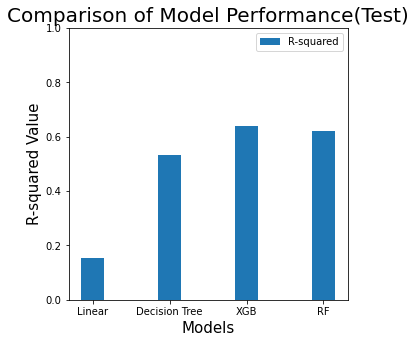

In [50]:
#plotting R2 test scores

# Define x-axis and y-axis data values 
x_labels = ['Linear', 'Decision Tree','XGB','RF'] 
rsquared = [lm_test, test_R2,xgbtest_R2,rf_regressortest_R2]
# Set the Label Locations and width of the bars 
x = np.arange(len(x_labels))
width= 0.3
plt.figure(figsize=(5,5))
# Plot side-by-side bars
bar = plt.bar(x, rsquared, width, label='R-squared')
# Customise the plot
plt.title('Comparison of Model Performance(Test)', fontsize = 20) 
plt.ylabel('R-squared Value', fontsize = 15)
plt.xlabel('Models', fontsize
=
15)
plt.xticks(x, x_labels)
plt.ylim(bottom = 0, top = 1.0)
plt.legend()
# Create a function to display data Labels/annotations for each bar 
def autolabel(bars):
    for each in bars:
        val=each.get_height()
        plt.annotate('{:.3f}'.format(val),
            xy=(each.get_x() + each.get_width()/2, val), xytext=(0, 2), # 2 points vertical offset 
            textcoords="offset points",
            ha='center', va='bottom')
# Use the autolabel function to display data Label for each bar autolabel(bar)

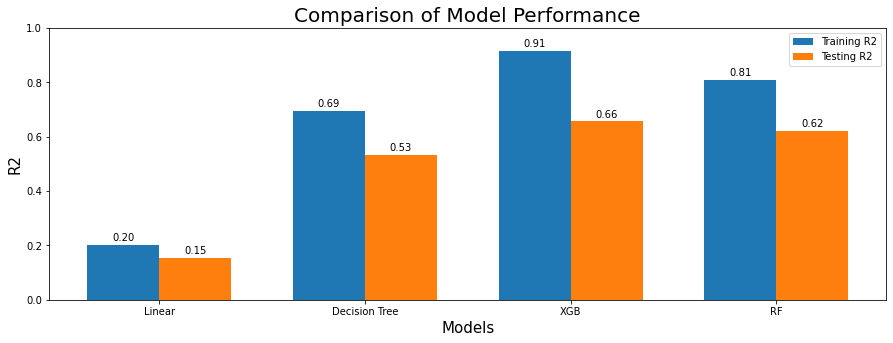

In [62]:
# Define x-axis and y-axis data values 
x_labels = ['Linear', 'Decision Tree','XGB','RF'] 
x_axis_train = [lm_train,train_R2, xgbtrain_R2, rf_regressor_R2] 
x_axis_test = [lm_test, test_R2,xgbtest_R2,rf_regressortest_R2]
# Set the Label Locations and width of the bars 
x = np.arange(len(x_labels))
width = 0.35
plt.figure(figsize=(15,5))
# Plot side-by-side bars
bar1 = plt.bar(x - width/2, x_axis_train, width, label='Training R2')
bar2 = plt.bar(x + width/2, x_axis_test, width, label='Testing R2')
#Customise the plot
plt.title('Comparison of Model Performance', fontsize = 20)
plt.ylabel('R2', fontsize = 15)
plt.xlabel('Models', fontsize = 15)
plt.xticks(x, x_labels)
plt.ylim (bottom = 0, top = 1.0)
plt.legend()
# Create a function to display data Labels/annotations for each bar 
def autolabel(bars):
    for each in bars:
        acc=each.get_height()
        plt.annotate('{:.2f}'.format(acc),
            xy=(each.get_x() + each.get_width() / 2, acc), 
            xytext=(0, 2), # 2 points vertical offset 
            textcoords="offset points",
            ha='center', va='bottom')
# Use the auto label function to display data Label for each bar
autolabel(bar1)
autolabel(bar2)

Comparing the Models using mean Cross Validation scores, I will take the one with the highest cross validation score as having a better performance.
From the results below, we will go with XGB Regressor as well,even though it is overfitted than RF regressor it still has the overall better test accuracy.

In [58]:
from sklearn.model_selection import cross_val_score
RF_CV = cross_val_score(estimator = rf_regressor, X = X_train, y = y_train, cv = 10)
print("Mean_RF_CV : ", RF_CV.mean())

Mean_RF_CV :  0.6539983936073807


In [59]:
from sklearn.model_selection import cross_val_score
XGB_CV = cross_val_score(estimator = xgb_best, X = X_train, y = y_train, cv = 10)
print("Mean_XGB_CV : ", XGB_CV.mean())

Mean_XGB_CV :  0.6662458495708565


In [60]:
dt_CV = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv = 10)
print("Mean_DecisionTree_CV : ", dt_CV.mean())

Mean_DecisionTree_CV :  0.5689245050093625


In [61]:
lin_CV = cross_val_score(estimator = lm, X = X_train, y = y_train, cv = 10)
print("Mean_Linear_cv : ", lin_CV.mean())

Mean_Linear_cv :  0.19662363982997216




## Conclusion

Out of all the models, the Ensemble Models perform the best in terms of accuracy/r2 score.

However, it is more expensive, and may not give a huge improvement for simpler problems as we have seen with the Classifier Models above. It may also tend to overfit but we can mitigate this by tuning the parameters to reduce the amount of overfitting. It may be more suitable for regression issues where there are more possible outputs compared to a binary classification model where there are only 2 possible predictions.

We may be able to get a better result by doing the following:
1) changing the input data - normalizing the input data using StandardScaler() etc. in order to get a better result
2) Trying Different Ensemble Models to see which one yields the best accuracy or R2 score.
3) using different assessment tools ( precision/recall for Classifier Models)
4) More Data - few thousand rows of data only, the overfitting issues might be mitigated. Or different ways of Bagging/Boosting Datasets may also help.

For the regression problem, more recent data from after 2019 may also help.